<a href="https://colab.research.google.com/github/drscicomm/food-security/blob/main/Final_Time_Series_Analysis_FromImpossible_2016_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# The path to the output folder where all the outputs will be saved
output_path = "/content/gdrive/MyDrive"

In [ ]:
#from google.colab import files
# upload file
#uploaded = files.upload()

In [ ]:
import pandas as pd

In [ ]:
# Read data into dataframe
df = pd.read_csv('/content/fromImpossibleFoods_all.csv')

In [ ]:
df.head()

author id                 created_at geo            id lang  like_count  \
0  1928214643  2017-02-01 22:07:28+00:00      8.270000e+17   en           0   
1  1928214643  2016-08-01 05:13:16+00:00      7.600000e+17   en           3   
2  1928214643  2016-08-03 21:34:47+00:00      7.610000e+17   en           1   
3  1928214643  2016-08-05 19:12:49+00:00      7.620000e+17   en           2   
4  1928214643  2016-08-05 01:28:22+00:00      7.610000e+17   en           2   

   quote_count  reply_count  retweet_count   source  \
0          0.1          0.2            0.3  Zendesk   
1          0.0          1.0            0.0  Zendesk   
2          0.0          0.0            1.0  Zendesk   
3          0.0          1.0            0.0  Zendesk   
4          0.0          0.0            0.0  Zendesk   

                                               tweet  
0  @DonGordon5 we'd love to hear what you think o...  
1  @steuartrhys you don't have to go far, we're c...  
2  @YaseminDenari so great to meet you! glad you ...  
3  @forkingtasty thanks for the article! email he...  
4  @Drcmac we're launching in SF this fall, stay ...

## Set up environment

In [ ]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words = stopwords.words('english')
stop_words.extend(['https','http', 'amp', 'co'])

In [ ]:
%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [ ]:
pip install openpyxl==3.0.7

     |████████████████████████████████| 243 kB 7.9 MB/s 
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.9
    Uninstalling openpyxl-3.0.9:
      Successfully uninstalled openpyxl-3.0.9


In [ ]:
import os


# Data Preprocessing

In [ ]:
#drop spaces
df = df.dropna(subset=['tweet'])

In [ ]:
# Remove punctuation
df['text_processed'] = \
df['tweet'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df['text_processed'] = \
df['text_processed'].map(lambda x: x.lower())

# Print out the first rows of df
df['text_processed'].head()

0    @dongordon5 we'd love to hear what you think o...
1    @steuartrhys you don't have to go far we're co...
2    @yasemindenari so great to meet you glad you e...
3    @forkingtasty thanks for the article email hel...
4    @drcmac we're launching in sf this fall stay t...
Name: text_processed, dtype: object

In [ ]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data = df.tweet.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:5])

[['wed', 'love', 'to', 'hear', 'what', 'you', 'think', 'once', 'you', 'have', 'chance', 'to', 'try', 'it'], ['you', 'dont', 'have', 'to', 'go', 'far', 'were', 'coming', 'to', 'sf', 'next'], ['so', 'great', 'to', 'meet', 'you', 'glad', 'you', 'enjoyed', 'our', 'meat', 'on', 'mission'], ['thanks', 'for', 'the', 'article', 'email', 'next', 'time', 'amp', 'well', 'save', 'you', 'hours', 'of', 'google', 'searching', 'for', 'heme'], ['were', 'launching', 'in', 'sf', 'this', 'fall', 'stay', 'tuned', 'for', 'updates']]


In [ ]:
df.head()

author id                 created_at geo            id lang  like_count  \
0  1928214643  2017-02-01 22:07:28+00:00      8.270000e+17   en           0   
1  1928214643  2016-08-01 05:13:16+00:00      7.600000e+17   en           3   
2  1928214643  2016-08-03 21:34:47+00:00      7.610000e+17   en           1   
3  1928214643  2016-08-05 19:12:49+00:00      7.620000e+17   en           2   
4  1928214643  2016-08-05 01:28:22+00:00      7.610000e+17   en           2   

   quote_count  reply_count  retweet_count   source  \
0          0.1          0.2            0.3  Zendesk   
1          0.0          1.0            0.0  Zendesk   
2          0.0          0.0            1.0  Zendesk   
3          0.0          1.0            0.0  Zendesk   
4          0.0          0.0            0.0  Zendesk   

                                               tweet  \
0  @DonGordon5 we'd love to hear what you think o...   
1  @steuartrhys you don't have to go far, we're c...   
2  @YaseminDenari so great to meet you! glad you ...   
3  @forkingtasty thanks for the article! email he...   
4  @Drcmac we're launching in SF this fall, stay ...   

                                      text_processed  
0  @dongordon5 we'd love to hear what you think o...  
1  @steuartrhys you don't have to go far we're co...  
2  @yasemindenari so great to meet you glad you e...  
3  @forkingtasty thanks for the article email hel...  
4  @drcmac we're launching in sf this fall stay t...

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
df.to_csv(f"{output_path}/fromImpossible_article_clean_30.csv", index=False)

# LDA Mallet Model

In [ ]:
#download mallet
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip

--2022-04-23 12:38:58--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip [following]
--2022-04-23 12:38:58--  https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  9.77MB/s    in 1.6s    

2022-04-23 12:39:00 (9.77 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]



In [ ]:
# unzip mallet
!unzip mallet-2.0.8.zip

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classify  
  inflating: mallet-2.0.8/bin/text2vectors  
  inflating: mallet-2.0.8/bin/vectors2classify  
  inflating: mallet-2.0.8/bin/vectors2info  
  inflating: mallet-2.0.8/bin/vectors2topics  
  inflating: mallet-2.0.8/bin/vectors2vectors  
  inflating: mallet-2.0.8/build.xml  
   creating: mallet-2.0.8/class/
   creating: mallet-2.0.8/class/cc/
   creating: mallet-2.0.8/class/cc/mallet/
   creating: mallet-2.0.8/class/cc/mallet/classify/
  inflating: mallet-2.0.8/class/cc/mallet/classify/AdaBoost.class  
  in

In [ ]:
mallet_path = '/content/mallet-2.0.8/bin/mallet'

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

In [ ]:
dict_corpus = {}

for i in range(len(corpus)):
  for idx, freq in corpus[i]:
    if id2word[idx] in dict_corpus:
      dict_corpus[id2word[idx]] += freq
    else:
       dict_corpus[id2word[idx]] = freq

In [ ]:
dict_df = pd.DataFrame.from_dict(dict_corpus, orient='index', columns=['freq'])

In [ ]:
dict_df.sort_values('freq', ascending=False).head(20)

freq
impossible  5580
burger      3972
thank       3487
make        2990
hear        2688
love        2043
look        1845
come        1780
stay        1659
restaurant  1635
tune        1635
share       1572
product     1551
give        1526
go          1476
work        1361
year        1357
support     1337
would       1329
grow        1327

In [ ]:
# Build LDA model
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=30, id2word=id2word)

In [ ]:
from pprint import pprint
# display topics
pprint(ldamallet.show_topics(formatted=False))

[(2,
  [('impossible', 0.14638783269961977),
   ('make', 0.09940249864204237),
   ('claim', 0.055676262900597503),
   ('heme', 0.048343291689299295),
   ('foods_correct', 0.045898967952199894),
   ('taste', 0.038294405214557306),
   ('homework', 0.032862574687669746),
   ('learn', 0.030418250950570342),
   ('produce', 0.024443237370994023),
   ('flavor', 0.021455730581205867)]),
 (21,
  [('ingredient', 0.08819680711855535),
   ('product', 0.07301753467678618),
   ('team', 0.06464276367443078),
   ('launch', 0.06464276367443078),
   ('forward', 0.06385762889295996),
   ('continue', 0.05940853179795865),
   ('people', 0.054697723109133733),
   ('plan', 0.03716304632295211),
   ('comply', 0.03585448835383408),
   ('option', 0.03506935357236326)]),
 (24,
  [('food', 0.1580176440062273),
   ('safety', 0.14244940321743643),
   ('impossible', 0.08121432278152568),
   ('read', 0.06512714063310845),
   ('consumer', 0.03684483653347172),
   ('issue', 0.036585365853658534),
   ('number', 0.033212

In [ ]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_ready, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('Coherence Score: ', coherence_ldamallet)

Coherence Score:  0.4526070334542956


In [ ]:
import pickle
pickle.dump(ldamallet, open("/content/gdrive/MyDrive/ldamallet.pkl", "wb"))

In [ ]:
ldamallet = pickle.load(open("/content/gdrive/MyDrive/ldamallet.pkl", "rb"))

In [ ]:
tm = ldamallet[corpus[1]]
tm

[(0, 0.03333333333333333),
 (1, 0.03333333333333333),
 (2, 0.03333333333333333),
 (3, 0.03333333333333333),
 (4, 0.03333333333333333),
 (5, 0.03333333333333333),
 (6, 0.03333333333333333),
 (7, 0.03333333333333333),
 (8, 0.03333333333333333),
 (9, 0.03333333333333333),
 (10, 0.03333333333333333),
 (11, 0.03333333333333333),
 (12, 0.03333333333333333),
 (13, 0.03333333333333333),
 (14, 0.03333333333333333),
 (15, 0.03333333333333333),
 (16, 0.03333333333333333),
 (17, 0.03333333333333333),
 (18, 0.03333333333333333),
 (19, 0.03333333333333333),
 (20, 0.03333333333333333),
 (21, 0.03333333333333333),
 (22, 0.03333333333333333),
 (23, 0.03333333333333333),
 (24, 0.03333333333333333),
 (25, 0.03333333333333333),
 (26, 0.03333333333333333),
 (27, 0.03333333333333333),
 (28, 0.03333333333333333),
 (29, 0.03333333333333333)]

In [ ]:
tm_results = ldamallet[corpus]

In [ ]:
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0] for topics in tm_results]

In [ ]:
topics = [[(term, round(wt, 3)) for term, wt in ldamallet.show_topic(n, topn=30)] for n in range(0, ldamallet.num_topics)]

# Topic Analysis

In [ ]:
#Below is the Topic-Term matrix shows 10 terms that forms each topic.
topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics], columns = ['Term'+str(i) for i in range(1, 31)],
                         index=['Topic '+str(t) for t in range(1, ldamallet.num_topics+1)]).T
topics_df.head()

Topic 1     Topic 2        Topic 3     Topic 4 Topic 5       Topic 6  \
Term1    store  impossible     impossible       share    stay    impossible   
Term2  grocery      burger           make    feedback    tune    restaurant   
Term3   detail         day          claim  experience   bring       whopper   
Term4     year       sound           heme     improve    news          cook   
Term5   retail       visit  foods_correct       reach    grow  conventional   

      Topic 7   Topic 8     Topic 9    Topic 10  ...    Topic 21    Topic 22  \
Term1   enjoy      make      burger      burger  ...  restaurant  ingredient   
Term2   happy      grow  impossible  impossible  ...        back     product   
Term3    hear      goal      sizzle       price  ...     partner        team   
Term4   drool  continue        taco      forget  ...       stock      launch   
Term5    glad     scale       lover       lover  ...  production     forward   

      Topic 23     Topic 24    Topic 25 Topic 26        Topic 27 Topic 28  \
Term1  product         hear        food     give           today     meat   
Term2     meat         love      safety     hear  impossiblefood   animal   
Term3    plant       chance  impossible     love  cookimpossible     make   
Term4     plan  opportunity        read  amazing            join  mission   
Term5     year      thought    consumer   talkin           start    plant   

      Topic 29  Topic 30  
Term1  forward   support  
Term2     grow    people  
Term3    world      kind  
Term4     year      feel  
Term5      lot  continue  

[5 rows x 30 columns]

In [ ]:
pd.set_option('display.max_colwidth', -1)

topics_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics], columns = ['Terms per Topic'],
                         index=['Topic'+str(t) for t in range(1, ldamallet.num_topics+1)] )
topics_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


Terms per Topic
Topic1   store, grocery, detail, year, retail, sell, announce, online, stoke, launch, news, excite, shelf, availability, vary, date, select_cities, socal, excited, confused, outlet, rollout, safeway, trip, start_selle, lookout, gelson, presence, map, super                                            
Topic2   impossible, burger, day, sound, visit, favorite, sausage, dish, make, pork, patty, top, purchase, hit, line, fry, verdict, breakfast, leave, pizza, closer, egg, idea, delish, bun, size, sizzle, adventure, spicy, travel                                                                         
Topic3   impossible, make, claim, heme, foods_correct, taste, homework, learn, produce, flavor, interested, process, beautiful, chicken_nugget, video, feelin, fall, fix, responsible, present, yeast, buy, scientist, sustainably, method, color, magic, red, beat, meaty                                  
Topic4   share, feedback, experience, improve, reach, lover, connect, contact, fellow, time, expectation, meet, unable, send, work, dont_hesitate, additional, resource, hearing, education, provide, tzkvcjgeji, valuable, utilize, incorporate, crucial, contribution, input, werent_feele, overcook      
Topic5   stay, tune, bring, news, grow, early, specific, timeline, hometown, tuned, exciting, announcement, detail, deet, reveal, exciting_new, globe, tacos, finger, couldnt_agree, munchie, wing, limit, year, senseless, pnoximpossible, weekly, senior, window, pricing                                 
Topic6   impossible, restaurant, whopper, cook, conventional, check, prepare, accommodate, home, participate, confirm, request, preparation, cashier, differently, cheese, directly, burger, nationwide, special_order, special, medium, kitchen, prefer, traditional, allergy, dine, omit, chef, recommend 
Topic7   enjoy, happy, hear, drool, glad, drooling, psyche, feelin, eye, tasty, pass, idea, birthday, glyphosate, favorite_spot, limit, pair, detect, organic, nice, year, cool, residue, soybean, delay, thinking, hang_tight, date, easily, excuse                                                        
Topic8   make, grow, goal, continue, scale, accessible, cost, benefit, economy, drop, affordable, decrease, foodservice, lower, anticipate, worth, section, trick, nice, drive, reality, tuned, cold, star, disappoint, molly, partnership, competitive, fly, grilling                                      
Topic9   burger, impossible, sizzle, taco, lover, lunch, fire, worldwide, difficult, trouble_finde, incredibly, school, upcome, bubble, dumpling, dip, confused, cell, box, await, expert, prevent, versatile, disinformation, brilliant, nutrition_fact, zwj, grindhouse, belly, typically                 
Topic10  burger, impossible, price, forget, lover, pick, yummy, aim, homemade, cut, suggest, ohqtkqcsf, meatgoal, likely_change, match, union, thrill, morning, kosher_certifie, getting_started, connoisseur, assistance, worth_note, room, merch, ceo, surprised, typically, respond, natural             
Topic11  recipe, beef, delicious, check, ground, cow, call, original, nutritious, recommend, gluten, worry, march, nearby, cooking, debut, head, innovate, compare, emission, current, level, low, water, version, host, comparable, full_ingredient, ingredient_list, inspiration                          
Topic12  work, make, hard, patience, meantime, happen, bring, rest_assure, sort, hesitate, recommendation, dont_worry, eventually, promise, widely, beginning, track, launched, curious, perfection, continually, seattle, tight, stateside, harder, nachos, ear, meatgoal, menus, weight                   
Topic13  time, great, order, area, send, slider, hope, whopper, email, offer, limited, concern, menu, local, hand, shoot, watch, directly, photo, add, matter, attention, discuss, delivery, situation, side, joke, invite, saverestaurant, message                                                         
Topic14  safety, food, eat, test, product, question, page, state, rigor

In [ ]:
topics_df.to_csv("/content/fromImpossible_topic key words_30.csv")


# WordClouds

In [ ]:
from wordcloud import WordCloud

In [ ]:
wc = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [ ]:
plt.rcParams['figure.figsize'] = [30, 15]

In [ ]:
# Create subplots for each topic
for i in range(30):

    wc.generate(text=topics_df["Terms per Topic"][i])
    
    plt.subplot(5, 6, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(topics_df.index[i])

plt.show()

# Dominant Topics

In [ ]:
# create a dataframe 
corpus_topic_df = pd.DataFrame()

# get the Titles from the original dataframe
corpus_topic_df['Dominant Topic'] = [item[0]+1 for item in corpus_topics]
corpus_topic_df['Contribution %'] = [round(item[1]*100, 2) for item in corpus_topics]
corpus_topic_df['Topic Terms'] = [topics_df.iloc[t[0]]['Terms per Topic'] for t in corpus_topics]



corpus_topic_df.head()

Dominant Topic  Contribution %  \
0  24              8.18             
1  1               3.33             
2  28              6.06             
3  13              6.67             
4  5               6.67             

                                                                                                                                                                                                                                                          Topic Terms  
0  hear, love, chance, opportunity, thought, company, investor, invest, woo, investment, give, finance, confident, dish_pic, excitement, daughter, pond, kitchen, yummy, build, occasion, faq, burn, expensive, piece, actively, question, thumb, drippin, attention   
1  store, grocery, detail, year, retail, sell, announce, online, stoke, launch, news, excite, shelf, availability, vary, date, select_cities, socal, excited, confused, outlet, rollout, safeway, trip, start_selle, lookout, gelson, presence, map, super             
2  meat, animal, make, mission, plant, planet, plant_based, tasty, cow, save, replace, delicious, create, plant_base, eater, turn, impact, system, global, sustainable, problem, step, trust, plot, technology, feeling, thousand, face, guess, huge                   
3  time, great, order, area, send, slider, hope, whopper, email, offer, limited, concern, menu, local, hand, shoot, watch, directly, photo, add, matter, attention, discuss, delivery, situation, side, joke, invite, saverestaurant, message                          
4  stay, tune, bring, news, grow, early, specific, timeline, hometown, tuned, exciting, announcement, detail, deet, reveal, exciting_new, globe, tacos, finger, couldnt_agree, munchie, wing, limit, year, senseless, pnoximpossible, weekly, senior, window, pricing

In [ ]:
dominant_topic_df = corpus_topic_df.groupby('Dominant Topic').agg(
                                  Doc_Count = ('Dominant Topic', np.size),
                                  Total_Docs_Perc = ('Dominant Topic', np.size)).reset_index()

dominant_topic_df['Total_Docs_Perc'] = dominant_topic_df['Total_Docs_Perc'].apply(lambda row: round((row*100) / len(corpus), 2))

dominant_topic_df

Dominant Topic  Doc_Count  Total_Docs_Perc
0   1               3123       13.59          
1   2               588        2.56           
2   3               604        2.63           
3   4               1074       4.67           
4   5               1003       4.37           
5   6               457        1.99           
6   7               1527       6.65           
7   8               379        1.65           
8   9               195        0.85           
9   10              227        0.99           
10  11              706        3.07           
11  12              644        2.80           
12  13              666        2.90           
13  14              386        1.68           
14  15              578        2.52           
15  16              544        2.37           
16  17              900        3.92           
17  18              725        3.16           
18  19              550        2.39           
19  20              906        3.94           
20  21              496        2.16           
21  22              279        1.21           
22  23              474        2.06           
23  24              1148       5.00           
24  25              407        1.77           
25  26              1128       4.91           
26  27              949        4.13           
27  28              663        2.89           
28  29              647        2.82           
29  30              1003       4.37

In [ ]:
dominant_topic_df.to_csv('FromImpossibe_DocNum per topic_30.csv')

In [ ]:
# concatenate with the main dataset
df = pd.concat([df, corpus_topic_df.reindex(df.index)], axis=1)

In [ ]:
df.head()

author id                 created_at geo            id lang  like_count  \
0  1928214643  2017-02-01 22:07:28+00:00      8.270000e+17  en   0            
1  1928214643  2016-08-01 05:13:16+00:00      7.600000e+17  en   3            
2  1928214643  2016-08-03 21:34:47+00:00      7.610000e+17  en   1            
3  1928214643  2016-08-05 19:12:49+00:00      7.620000e+17  en   2            
4  1928214643  2016-08-05 01:28:22+00:00      7.610000e+17  en   2            

   quote_count  reply_count  retweet_count   source  \
0  0.1          0.2          0.3            Zendesk   
1  0.0          1.0          0.0            Zendesk   
2  0.0          0.0          1.0            Zendesk   
3  0.0          1.0          0.0            Zendesk   
4  0.0          0.0          0.0            Zendesk   

                                                                                                                                         tweet  \
0  @DonGordon5 we'd love to hear what you think once you have a chance to try it!                                                                
1  @steuartrhys you don't have to go far, we're coming to SF next!                                                                               
2  @YaseminDenari so great to meet you! glad you enjoyed our meat on a mission                                                                   
3  @forkingtasty thanks for the article! email hello@impossiblefoods.com next time &amp; we'll save you 4 hours of google searching for "heme"   
4  @Drcmac we're launching in SF this fall, stay tuned for updates!                                                                              

                                                                                                                              text_processed  \
0  @dongordon5 we'd love to hear what you think once you have a chance to try it                                                               
1  @steuartrhys you don't have to go far we're coming to sf next                                                                               
2  @yasemindenari so great to meet you glad you enjoyed our meat on a mission                                                                  
3  @forkingtasty thanks for the article email hello@impossiblefoodscom next time &amp; we'll save you 4 hours of google searching for "heme"   
4  @drcmac we're launching in sf this fall stay tuned for updates                                                                              

   Dominant Topic  Contribution %  \
0  24              8.18             
1  1               3.33             
2  28              6.06             
3  13              6.67             
4  5               6.67             

                                                                                                                                                                                                                                                          Topic Terms  
0  hear, love, chance, opportunity, thought, company, investor, invest, woo, investment, give, finance, confident, dish_pic, excitement, daughter, pond, kitchen, yummy, build, occasion, faq, burn, expensive, piece, actively, question, thumb, drippin, attention   
1  store, grocery, detail, year, retail, sell, announce, online, stoke, launch, news, excite, shelf, availability, vary, date, select_cities, socal, excited, confused, outlet, rollout, safeway, trip, start_selle, lookout, gelson, presence, map, super             
2  meat, animal, make, mission, plant, planet, plant_based, tasty, cow, save, replace, delicious, create, plant_base, eater, turn, impact, system, global, sustainable, problem, step, trust, plot, technology, feeling, thousand, face, guess, huge                   
3  time, great, order, area, send, slider, hope, whopper, email, offer, limited, concern, menu, local, hand, shoot, watch, directly, photo, add, matter, attention, discuss, deli

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22976 entries, 0 to 22975
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   author id       22976 non-null  int64  
 1   created_at      22976 non-null  object 
 2   geo             22976 non-null  object 
 3   id              22976 non-null  float64
 4   lang            22976 non-null  object 
 5   like_count      22976 non-null  int64  
 6   quote_count     22976 non-null  float64
 7   reply_count     22976 non-null  float64
 8   retweet_count   22976 non-null  float64
 9   source          22976 non-null  object 
 10  tweet           22976 non-null  object 
 11  text_processed  22976 non-null  object 
 12  Dominant Topic  22976 non-null  int64  
 13  Contribution %  22976 non-null  float64
 14  Topic Terms     22976 non-null  object 
dtypes: float64(5), int64(3), object(7)
memory usage: 2.8+ MB


In [ ]:
df['text_processed'] = df['text_processed'].astype(str)

# Map to Topic Labels

In [ ]:
# Define the topic labels for all the topics identified.
 
topics_dict = [[1, 'Topic 1'],
               [2, 'Topic 2'], 
               [3, 'Topic 3'], 
               [4, 'Topic 4'],
               [5, 'Topic 5'],
               [6, 'Topic 6'],
               [7, 'Topic 7'],
               [8, 'Topic 8'],
               [9, 'Topic 9'],
               [10, 'Topic 10'],
               [11, 'Topic 11'],
               [12, 'Topic 12'],
               [13, 'Topic 13'],
               [14, 'Topic 14'],
               [15, 'Topic 15'],
               [16, 'Topic 16'],
               [17, 'Topic 17'],
               [18, 'Topic 18'],
               [19, 'Topic 19'],
               [20, 'Topic 20'],
               [21, 'Topic 21'],
               [22, 'Topic 22'],
               [23, 'Topic 23'],
               [24, 'Topic 24'],
               [25, 'Topic 25'],
               [26, 'Topic 26'],
               [27, 'Topic 27'],
               [28, 'Topic 28'],
               [29, 'Topic 29'],
               [30, 'Topic 30']
               ]

labels = pd.DataFrame(topics_dict, columns =['topic_num', 'topic_label'])

# merge with the main dataset
df = pd.merge(df, labels, how='left', left_on = 'Dominant Topic', right_on='topic_num')
df.drop("topic_num", axis=1, inplace=True)
df.head()

author id                 created_at geo            id lang  like_count  \
0  1928214643  2017-02-01 22:07:28+00:00      8.270000e+17  en   0            
1  1928214643  2016-08-01 05:13:16+00:00      7.600000e+17  en   3            
2  1928214643  2016-08-03 21:34:47+00:00      7.610000e+17  en   1            
3  1928214643  2016-08-05 19:12:49+00:00      7.620000e+17  en   2            
4  1928214643  2016-08-05 01:28:22+00:00      7.610000e+17  en   2            

   quote_count  reply_count  retweet_count   source  \
0  0.1          0.2          0.3            Zendesk   
1  0.0          1.0          0.0            Zendesk   
2  0.0          0.0          1.0            Zendesk   
3  0.0          1.0          0.0            Zendesk   
4  0.0          0.0          0.0            Zendesk   

                                                                                                                                         tweet  \
0  @DonGordon5 we'd love to hear what you think once you have a chance to try it!                                                                
1  @steuartrhys you don't have to go far, we're coming to SF next!                                                                               
2  @YaseminDenari so great to meet you! glad you enjoyed our meat on a mission                                                                   
3  @forkingtasty thanks for the article! email hello@impossiblefoods.com next time &amp; we'll save you 4 hours of google searching for "heme"   
4  @Drcmac we're launching in SF this fall, stay tuned for updates!                                                                              

                                                                                                                              text_processed  \
0  @dongordon5 we'd love to hear what you think once you have a chance to try it                                                               
1  @steuartrhys you don't have to go far we're coming to sf next                                                                               
2  @yasemindenari so great to meet you glad you enjoyed our meat on a mission                                                                  
3  @forkingtasty thanks for the article email hello@impossiblefoodscom next time &amp; we'll save you 4 hours of google searching for "heme"   
4  @drcmac we're launching in sf this fall stay tuned for updates                                                                              

   Dominant Topic  Contribution %  \
0  24              8.18             
1  1               3.33             
2  28              6.06             
3  13              6.67             
4  5               6.67             

                                                                                                                                                                                                                                                          Topic Terms  \
0  hear, love, chance, opportunity, thought, company, investor, invest, woo, investment, give, finance, confident, dish_pic, excitement, daughter, pond, kitchen, yummy, build, occasion, faq, burn, expensive, piece, actively, question, thumb, drippin, attention    
1  store, grocery, detail, year, retail, sell, announce, online, stoke, launch, news, excite, shelf, availability, vary, date, select_cities, socal, excited, confused, outlet, rollout, safeway, trip, start_selle, lookout, gelson, presence, map, super              
2  meat, animal, make, mission, plant, planet, plant_based, tasty, cow, save, replace, delicious, create, plant_base, eater, turn, impact, system, global, sustainable, problem, step, trust, plot, technology, feeling, thousand, face, guess, huge                    
3  time, great, order, area, send, slider, hope, whopper, email, offer, limited, concern, menu, local, hand, shoot, watch, directly, photo, add, matter, attention, discuss, 

In [ ]:
num_topics=30

In [ ]:
# save data in data assets
df.to_csv(f"{output_path}/fromImpossible_article_topic_{num_topics}.csv", index=False)

# Sentiment Analysis

In [ ]:
# install and import libraries
!pip install textblob
from textblob import TextBlob

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import datetime as dt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(f"{output_path}/fromImpossible_article_topic_{num_topics}.csv")
df.head()

author id                 created_at geo            id lang  like_count  \
0  1928214643  2017-02-01 22:07:28+00:00      8.270000e+17  en   0            
1  1928214643  2016-08-01 05:13:16+00:00      7.600000e+17  en   3            
2  1928214643  2016-08-03 21:34:47+00:00      7.610000e+17  en   1            
3  1928214643  2016-08-05 19:12:49+00:00      7.620000e+17  en   2            
4  1928214643  2016-08-05 01:28:22+00:00      7.610000e+17  en   2            

   quote_count  reply_count  retweet_count   source  \
0  0.1          0.2          0.3            Zendesk   
1  0.0          1.0          0.0            Zendesk   
2  0.0          0.0          1.0            Zendesk   
3  0.0          1.0          0.0            Zendesk   
4  0.0          0.0          0.0            Zendesk   

                                                                                                                                         tweet  \
0  @DonGordon5 we'd love to hear what you think once you have a chance to try it!                                                                
1  @steuartrhys you don't have to go far, we're coming to SF next!                                                                               
2  @YaseminDenari so great to meet you! glad you enjoyed our meat on a mission                                                                   
3  @forkingtasty thanks for the article! email hello@impossiblefoods.com next time &amp; we'll save you 4 hours of google searching for "heme"   
4  @Drcmac we're launching in SF this fall, stay tuned for updates!                                                                              

                                                                                                                              text_processed  \
0  @dongordon5 we'd love to hear what you think once you have a chance to try it                                                               
1  @steuartrhys you don't have to go far we're coming to sf next                                                                               
2  @yasemindenari so great to meet you glad you enjoyed our meat on a mission                                                                  
3  @forkingtasty thanks for the article email hello@impossiblefoodscom next time &amp; we'll save you 4 hours of google searching for "heme"   
4  @drcmac we're launching in sf this fall stay tuned for updates                                                                              

   Dominant Topic  Contribution %  \
0  24              8.18             
1  1               3.33             
2  28              6.06             
3  13              6.67             
4  5               6.67             

                                                                                                                                                                                                                                                          Topic Terms  \
0  hear, love, chance, opportunity, thought, company, investor, invest, woo, investment, give, finance, confident, dish_pic, excitement, daughter, pond, kitchen, yummy, build, occasion, faq, burn, expensive, piece, actively, question, thumb, drippin, attention    
1  store, grocery, detail, year, retail, sell, announce, online, stoke, launch, news, excite, shelf, availability, vary, date, select_cities, socal, excited, confused, outlet, rollout, safeway, trip, start_selle, lookout, gelson, presence, map, super              
2  meat, animal, make, mission, plant, planet, plant_based, tasty, cow, save, replace, delicious, create, plant_base, eater, turn, impact, system, global, sustainable, problem, step, trust, plot, technology, feeling, thousand, face, guess, huge                    
3  time, great, order, area, send, slider, hope, whopper, email, offer, limited, concern, menu, local, hand, shoot, watch, directly, photo, add, matter, attention, discuss, 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22976 entries, 0 to 22975
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   author id       22976 non-null  int64  
 1   created_at      22976 non-null  object 
 2   geo             22976 non-null  object 
 3   id              22976 non-null  float64
 4   lang            22976 non-null  object 
 5   like_count      22976 non-null  int64  
 6   quote_count     22976 non-null  float64
 7   reply_count     22976 non-null  float64
 8   retweet_count   22976 non-null  float64
 9   source          22976 non-null  object 
 10  tweet           22976 non-null  object 
 11  text_processed  22976 non-null  object 
 12  Dominant Topic  22976 non-null  int64  
 13  Contribution %  22976 non-null  float64
 14  Topic Terms     22976 non-null  object 
 15  topic_label     22976 non-null  object 
dtypes: float64(5), int64(3), object(8)
memory usage: 2.8+ MB


In [ ]:
df['text_processed'] = df['text_processed'].astype(str)

In [ ]:
# sentiment analysis on 'article_clean' column 

df["created_at"] = pd.to_datetime(df["created_at"])
df['polarity'] = df['text_processed'].apply(lambda x : TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['text_processed'].apply(lambda x : TextBlob(x).sentiment.subjectivity)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22976 entries, 0 to 22975
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   author id       22976 non-null  int64              
 1   created_at      22976 non-null  datetime64[ns, UTC]
 2   geo             22976 non-null  object             
 3   id              22976 non-null  float64            
 4   lang            22976 non-null  object             
 5   like_count      22976 non-null  int64              
 6   quote_count     22976 non-null  float64            
 7   reply_count     22976 non-null  float64            
 8   retweet_count   22976 non-null  float64            
 9   source          22976 non-null  object             
 10  tweet           22976 non-null  object             
 11  text_processed  22976 non-null  object             
 12  Dominant Topic  22976 non-null  int64              
 13  Contribution %  22976 non-null 

In [ ]:
# save data to the project data files

df[['id', 'created_at', 'polarity', 'subjectivity']].to_csv(f"{output_path}/fromImpossible_sentiment_30.csv", index = False)

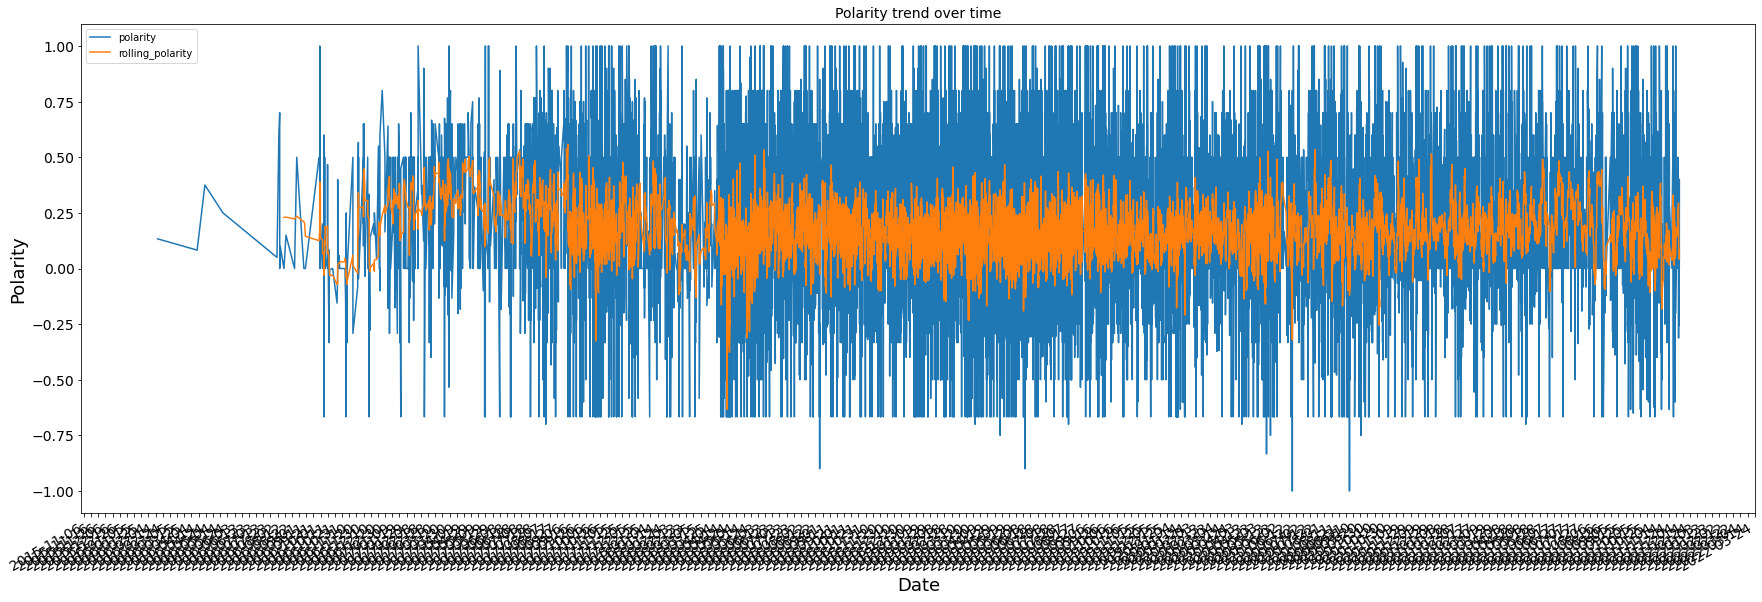

In [ ]:
#polarity over time
df = df[["created_at", "polarity", "subjectivity"]].groupby("created_at").mean().reset_index()
df['rolling_polarity'] = df.polarity.rolling(window=10).mean()
df['rolling_subjectivity'] = df.subjectivity.rolling(window=10).mean()
ax = df.plot(x="created_at", 
        y=["polarity", "rolling_polarity"], 
        figsize=(30, 10), 
        fontsize=14)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.xlabel("Date", fontsize=18)
plt.ylabel("Polarity", fontsize=18)
plt.title("Polarity trend over time", fontsize=14)
plt.show()

In [ ]:
# Subjectivity over time
ax = df.plot(x="created_at", 
        y=["subjectivity", "rolling_subjectivity"], 
        figsize=(30, 10), 
        fontsize=14)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.xlabel("Date", fontsize=18)
plt.ylabel("Subjectivity", fontsize=18)
plt.title("Subjectivity trend over time", fontsize=14)
plt.show()

# Time Series Heatmaps

In [ ]:
num_topics = 30
articles = pd.read_csv(f"{output_path}/fromImpossible_article_topic_{num_topics}.csv")
articles.head()

author id                 created_at geo            id lang  like_count  \
0  1928214643  2017-02-01 22:07:28+00:00      8.270000e+17  en   0            
1  1928214643  2016-08-01 05:13:16+00:00      7.600000e+17  en   3            
2  1928214643  2016-08-03 21:34:47+00:00      7.610000e+17  en   1            
3  1928214643  2016-08-05 19:12:49+00:00      7.620000e+17  en   2            
4  1928214643  2016-08-05 01:28:22+00:00      7.610000e+17  en   2            

   quote_count  reply_count  retweet_count   source  \
0  0.1          0.2          0.3            Zendesk   
1  0.0          1.0          0.0            Zendesk   
2  0.0          0.0          1.0            Zendesk   
3  0.0          1.0          0.0            Zendesk   
4  0.0          0.0          0.0            Zendesk   

                                                                                                                                         tweet  \
0  @DonGordon5 we'd love to hear what you think once you have a chance to try it!                                                                
1  @steuartrhys you don't have to go far, we're coming to SF next!                                                                               
2  @YaseminDenari so great to meet you! glad you enjoyed our meat on a mission                                                                   
3  @forkingtasty thanks for the article! email hello@impossiblefoods.com next time &amp; we'll save you 4 hours of google searching for "heme"   
4  @Drcmac we're launching in SF this fall, stay tuned for updates!                                                                              

                                                                                                                              text_processed  \
0  @dongordon5 we'd love to hear what you think once you have a chance to try it                                                               
1  @steuartrhys you don't have to go far we're coming to sf next                                                                               
2  @yasemindenari so great to meet you glad you enjoyed our meat on a mission                                                                  
3  @forkingtasty thanks for the article email hello@impossiblefoodscom next time &amp; we'll save you 4 hours of google searching for "heme"   
4  @drcmac we're launching in sf this fall stay tuned for updates                                                                              

   Dominant Topic  Contribution %  \
0  24              8.18             
1  1               3.33             
2  28              6.06             
3  13              6.67             
4  5               6.67             

                                                                                                                                                                                                                                                          Topic Terms  \
0  hear, love, chance, opportunity, thought, company, investor, invest, woo, investment, give, finance, confident, dish_pic, excitement, daughter, pond, kitchen, yummy, build, occasion, faq, burn, expensive, piece, actively, question, thumb, drippin, attention    
1  store, grocery, detail, year, retail, sell, announce, online, stoke, launch, news, excite, shelf, availability, vary, date, select_cities, socal, excited, confused, outlet, rollout, safeway, trip, start_selle, lookout, gelson, presence, map, super              
2  meat, animal, make, mission, plant, planet, plant_based, tasty, cow, save, replace, delicious, create, plant_base, eater, turn, impact, system, global, sustainable, problem, step, trust, plot, technology, feeling, thousand, face, guess, huge                    
3  time, great, order, area, send, slider, hope, whopper, email, offer, limited, concern, menu, local, hand, shoot, watch, directly, photo, add, matter, attention, discuss, 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

In [ ]:
articles_per_day = articles[["created_at", "topic_label"]].copy()
articles_per_day["n_articles"] = 1
articles_per_day = articles_per_day.groupby("created_at").agg({
    "topic_label": lambda x: list(x),
    "n_articles": lambda x: sum(x)
}).reset_index(drop=False)
articles_per_day["topic_label"] = articles_per_day["topic_label"].apply(lambda x: list(set(x)))
articles_per_day["n_topics"] = articles_per_day["topic_label"].apply(len)
articles_per_day.head()

created_at topic_label  n_articles  n_topics
0  2016-02-16 17:03:56+00:00  [Topic 25]  1           1       
1  2016-04-11 21:17:48+00:00  [Topic 20]  1           1       
2  2016-04-22 16:58:58+00:00  [Topic 19]  1           1       
3  2016-05-17 20:43:17+00:00  [Topic 1]   2           1       
4  2016-08-01 05:13:16+00:00  [Topic 1]   1           1

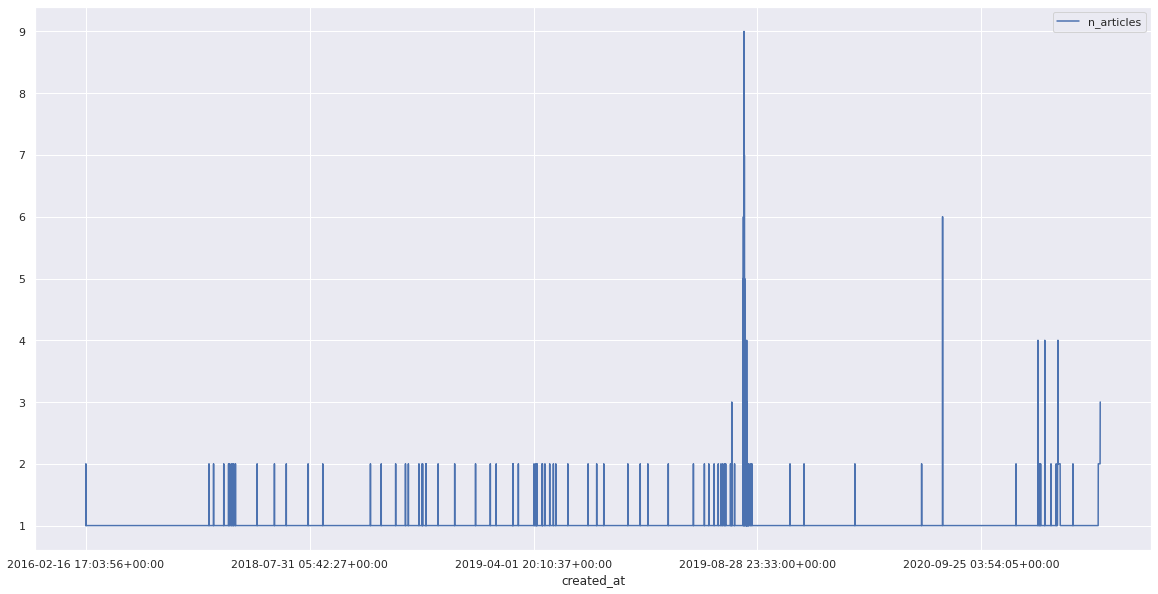

In [ ]:
articles_per_day.plot(x="created_at", 
                      y="n_articles", 
                      figsize=(20, 10))

In [ ]:
rolling_window_length = 100

articles_per_day_rolling = articles_per_day.copy()
articles_per_day_rolling["n_articles"] = articles_per_day_rolling["n_articles"].rolling(window=rolling_window_length).mean()
articles_per_day_rolling.plot(x="created_at", 
                              y="n_articles", 
                              figsize=(20, 10))

In [ ]:
all_topics = pd.read_csv(f"{output_path}/fromImpossible_article_topic_{num_topics}.csv",
                         usecols=["topic_label"])
all_topics = all_topics["topic_label"].unique()

In [ ]:
articles_per_day["topic_occurrences"] = articles_per_day["topic_label"].apply(lambda x: [(elem, x.count(elem)) for elem in all_topics])
for topic_name in all_topics:
    articles_per_day[topic_name] = articles_per_day["topic_occurrences"].apply(lambda x: [elem[1] for elem in x if elem[0] == topic_name])
    articles_per_day[topic_name] = articles_per_day[topic_name].apply(lambda x: x[0] if len(x) > 0 else 0)
articles_per_day.drop(["topic_label", "n_articles", "n_topics", "topic_occurrences"], axis=1, inplace=True)
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.head()

Topic 24  Topic 1  Topic 28  Topic 13  Topic 5  \
created_at                                                                  
2016-02-16 17:03:56+00:00  0         0        0         0         0         
2016-04-11 21:17:48+00:00  0         0        0         0         0         
2016-04-22 16:58:58+00:00  0         0        0         0         0         
2016-05-17 20:43:17+00:00  0         1        0         0         0         
2016-08-01 05:13:16+00:00  0         1        0         0         0         

                           Topic 20  Topic 17  Topic 15  Topic 16  Topic 11  \
created_at                                                                    
2016-02-16 17:03:56+00:00  0         0         0         0         0          
2016-04-11 21:17:48+00:00  1         0         0         0         0          
2016-04-22 16:58:58+00:00  0         0         0         0         0          
2016-05-17 20:43:17+00:00  0         0         0         0         0          
2016-08-01 05:13:16+00:00  0         0         0         0         0          

                           ...  Topic 3  Topic 6  Topic 19  Topic 22  \
created_at                 ...                                         
2016-02-16 17:03:56+00:00  ...  0        0        0         0          
2016-04-11 21:17:48+00:00  ...  0        0        0         0          
2016-04-22 16:58:58+00:00  ...  0        0        1         0          
2016-05-17 20:43:17+00:00  ...  0        0        0         0          
2016-08-01 05:13:16+00:00  ...  0        0        0         0          

                           Topic 21  Topic 26  Topic 2  Topic 18  Topic 23  \
created_at                                                                   
2016-02-16 17:03:56+00:00  0         0         0        0         0          
2016-04-11 21:17:48+00:00  0         0         0        0         0          
2016-04-22 16:58:58+00:00  0         0         0        0         0          
2016-05-17 20:43:17+00:00  0         0         0        0         0          
2016-08-01 05:13:16+00:00  0         0         0        0         0          

                           Topic 14  
created_at                           
2016-02-16 17:03:56+00:00  0         
2016-04-11 21:17:48+00:00  0         
2016-04-22 16:58:58+00:00  0         
2016-05-17 20:43:17+00:00  0         
2016-08-01 05:13:16+00:00  0         

[5 rows x 30 columns]

In [ ]:
articles_per_day.to_csv('articles-per-day-30-impossible.csv')

In [ ]:
from google.colab import files
# upload file
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
articles_per_day = pd.read_csv('/content/articles-per-day-30-impossible.csv')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Topic 1   22656 non-null  int64
 1   Topic 2   22656 non-null  int64
 2   Topic 3   22656 non-null  int64
 3   Topic 4   22656 non-null  int64
 4   Topic 5   22656 non-null  int64
 5   Topic 6   22656 non-null  int64
 6   Topic 7   22656 non-null  int64
 7   Topic 8   22656 non-null  int64
 8   Topic 9   22656 non-null  int64
 9   Topic 10  22656 non-null  int64
 10  Topic 11  22656 non-null  int64
 11  Topic 12  22656 non-null  int64
 12  Topic 13  22656 non-null  int64
 13  Topic 14  22656 non-null  int64
 14  Topic 15  22656 non-null  int64
 15  Topic 16  22656 non-null  int64
 16  Topic 17  22656 non-null  int64
 17  Topic 18  22656 non-null  int64
 18  Topic 19  22656 non-null  int64
 19  Topic 20  22656 non-null  int64
 20  Topic 21  22656 non-null  int64
 

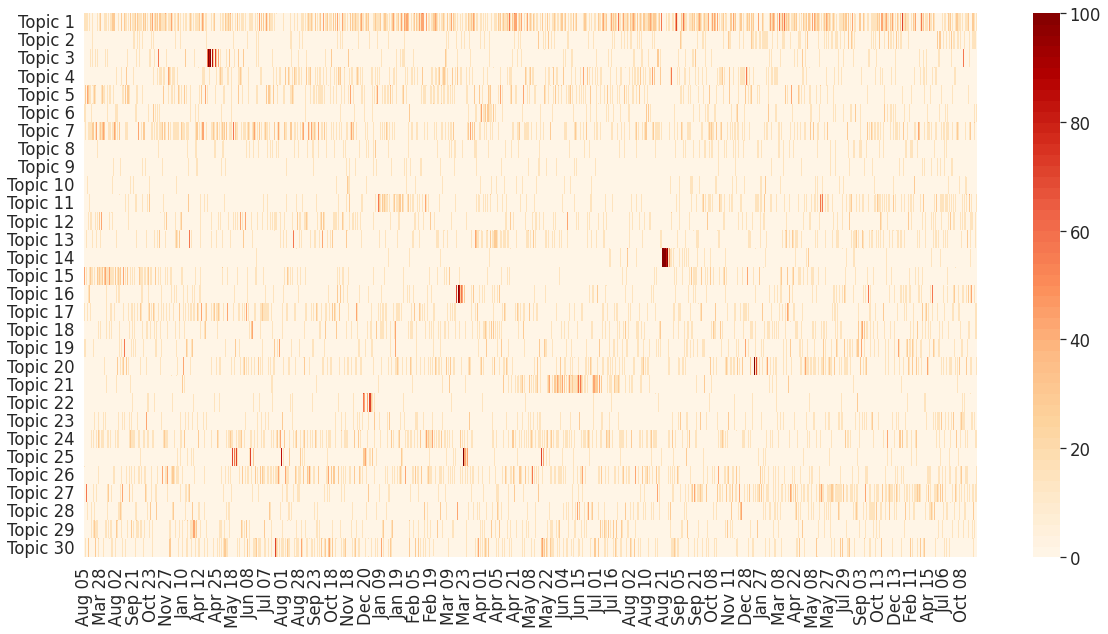

In [ ]:
rolling_window_length = 7

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 10))

sns.heatmap(df_heatmap, cmap=sns.color_palette("OrRd", 50))

plt.savefig(f"{output_path}/plot_topic_{num_topics}.pdf")

# Individual Plots of Number of Tweets Per Topic Per Day

In [ ]:
articles_per_day = pd.read_excel('/content/Topic 1.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Topic 1  22656 non-null  int64
dtypes: int64(1)
memory usage: 354.0+ KB


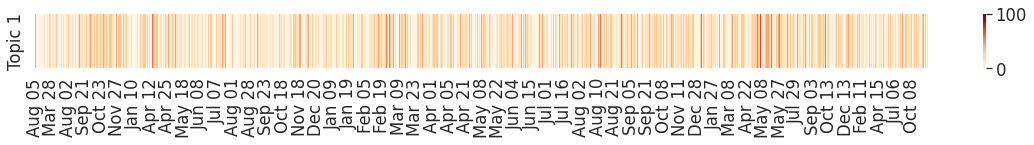

In [ ]:
rolling_window_length = 7

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("OrRd", 50),vmin= 0, vmax=100)

plt.savefig(f"{output_path}/plot_topic_1.png")

In [ ]:
articles_per_day = pd.read_excel('/content/Topic 2.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Topic 2  22656 non-null  int64
dtypes: int64(1)
memory usage: 354.0+ KB


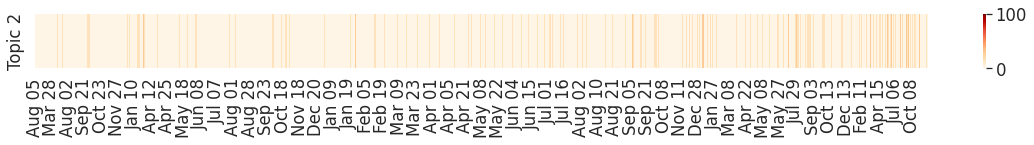

In [ ]:
rolling_window_length = 7

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("OrRd", 50),vmin= 0, vmax=100)

plt.savefig(f"{output_path}/plot_topic_2.png")

In [ ]:
articles_per_day = pd.read_excel('/content/Topic 3.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Topic 3  22656 non-null  int64
dtypes: int64(1)
memory usage: 354.0+ KB


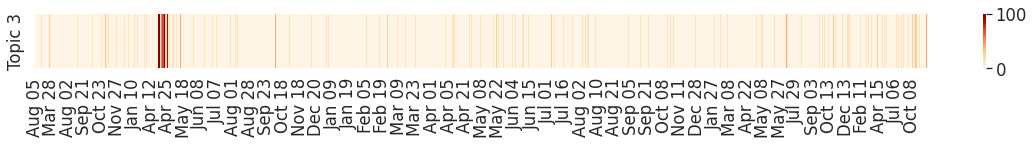

In [ ]:
rolling_window_length = 7

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("OrRd", 50),vmin= 0, vmax=100)

plt.savefig(f"{output_path}/plot_topic_3.png")

In [ ]:
articles_per_day = pd.read_excel('/content/Topic 4.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Topic 4  22656 non-null  int64
dtypes: int64(1)
memory usage: 354.0+ KB


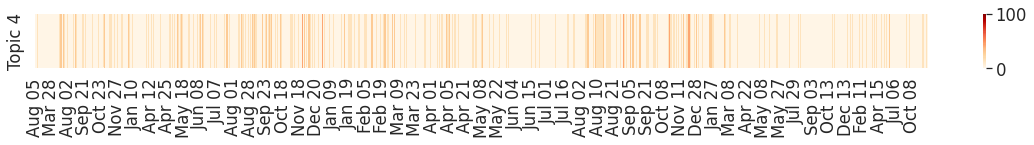

In [ ]:
rolling_window_length = 7

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("OrRd", 50),vmin= 0, vmax=100)

plt.savefig(f"{output_path}/plot_topic_4.png")

In [ ]:
articles_per_day = pd.read_excel('/content/Topic 5.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Topic 5  22656 non-null  int64
dtypes: int64(1)
memory usage: 354.0+ KB


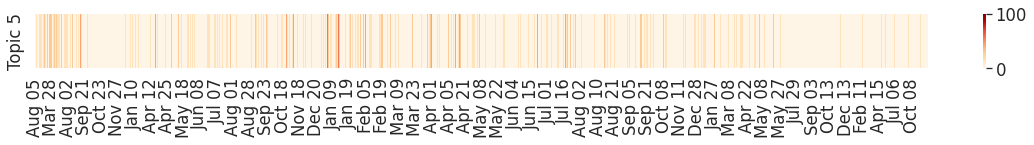

In [ ]:
rolling_window_length = 7

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("OrRd", 50),vmin= 0, vmax=100)

plt.savefig(f"{output_path}/plot_topic_5.png")

In [ ]:
articles_per_day = pd.read_excel('/content/Topic 6.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Topic 6  22656 non-null  int64
dtypes: int64(1)
memory usage: 354.0+ KB


In [ ]:
rolling_window_length = 7

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("OrRd", 50),vmin= 0, vmax=100)

plt.savefig(f"{output_path}/plot_topic_6.png")

In [ ]:
articles_per_day = pd.read_excel('/content/Topic 7.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Topic 7  22656 non-null  int64
dtypes: int64(1)
memory usage: 354.0+ KB


In [ ]:
rolling_window_length = 7

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("OrRd", 50),vmin= 0, vmax=100)

plt.savefig(f"{output_path}/plot_topic_7.png")

In [ ]:
articles_per_day = pd.read_excel('/content/Topic 8.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Topic 8  22656 non-null  int64
dtypes: int64(1)
memory usage: 354.0+ KB


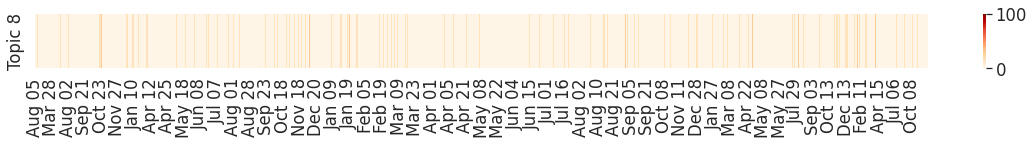

In [ ]:
rolling_window_length = 7

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("OrRd", 50),vmin= 0, vmax=100)

plt.savefig(f"{output_path}/plot_topic_8.png")

In [ ]:
articles_per_day = pd.read_excel('/content/Topic 9.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Topic 9  22656 non-null  int64
dtypes: int64(1)
memory usage: 354.0+ KB


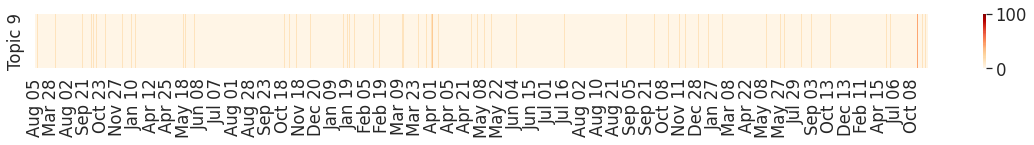

In [ ]:
rolling_window_length = 7

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("OrRd", 50),vmin= 0, vmax=100)

plt.savefig(f"{output_path}/plot_topic_9.png")

In [ ]:
articles_per_day = pd.read_excel('/content/Topic 10.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Topic 10  22656 non-null  int64
dtypes: int64(1)
memory usage: 354.0+ KB


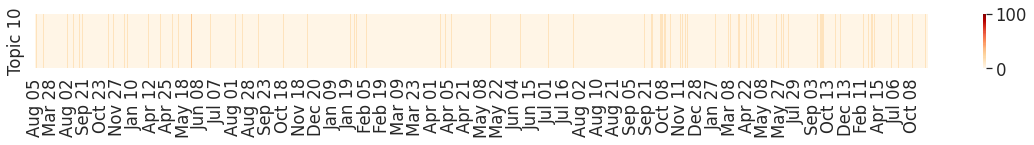

In [ ]:
rolling_window_length = 7

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("OrRd", 50),vmin= 0, vmax=100)

plt.savefig(f"{output_path}/plot_topic_10.png")

In [ ]:
articles_per_day = pd.read_excel('/content/Topic 11.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Topic 11  22656 non-null  int64
dtypes: int64(1)
memory usage: 354.0+ KB


In [ ]:
rolling_window_length = 7

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("OrRd", 50),vmin= 0, vmax=100)

plt.savefig(f"{output_path}/plot_topic_11.png")

In [ ]:
articles_per_day = pd.read_excel('/content/Topic 12.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Topic 12  22656 non-null  int64
dtypes: int64(1)
memory usage: 354.0+ KB


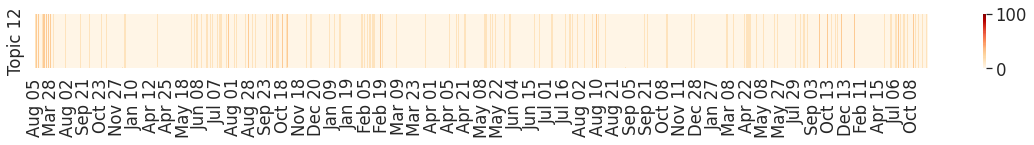

In [ ]:
rolling_window_length = 7

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("OrRd", 50),vmin= 0, vmax=100)

plt.savefig(f"{output_path}/plot_topic_12.png")

In [ ]:
articles_per_day = pd.read_excel('/content/Topic 13.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Topic 13  22656 non-null  int64
dtypes: int64(1)
memory usage: 354.0+ KB


In [ ]:
rolling_window_length = 7

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("OrRd", 50),vmin= 0, vmax=100)

plt.savefig(f"{output_path}/plot_topic_13.png")

In [ ]:
articles_per_day = pd.read_excel('/content/Topic 14.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Topic 14  22656 non-null  int64
dtypes: int64(1)
memory usage: 354.0+ KB


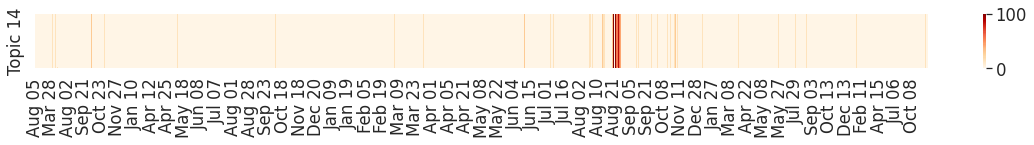

In [ ]:
rolling_window_length = 7

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("OrRd", 50),vmin= 0, vmax=100)

plt.savefig(f"{output_path}/plot_topic_14.png")

In [ ]:
articles_per_day = pd.read_excel('/content/Topic 15.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Topic 15  22656 non-null  int64
dtypes: int64(1)
memory usage: 354.0+ KB


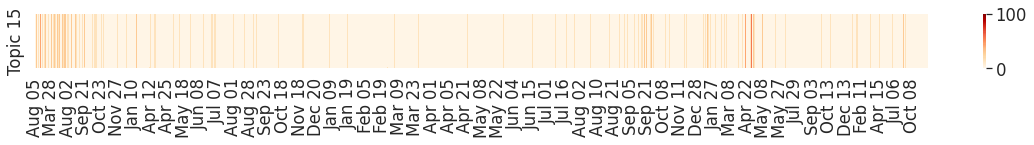

In [ ]:
rolling_window_length = 7

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("OrRd", 50),vmin= 0, vmax=100)

plt.savefig(f"{output_path}/plot_topic_15.png")

In [ ]:
articles_per_day = pd.read_excel('/content/Topic 16.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Topic 16  22656 non-null  int64
dtypes: int64(1)
memory usage: 354.0+ KB


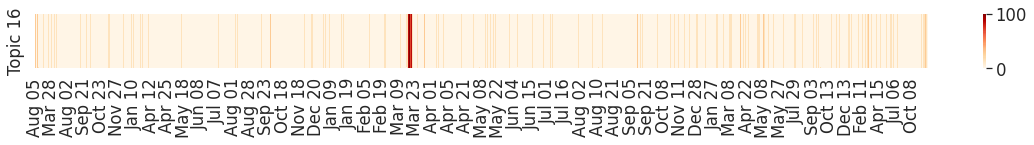

In [ ]:
rolling_window_length = 7

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("OrRd", 50),vmin= 0, vmax=100)

plt.savefig(f"{output_path}/plot_topic_16.png")

In [ ]:
articles_per_day = pd.read_excel('/content/Topic 17.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Topic 17  22656 non-null  int64
dtypes: int64(1)
memory usage: 354.0+ KB


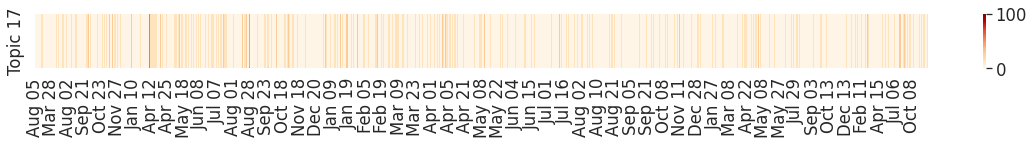

In [ ]:
rolling_window_length = 7

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("OrRd", 50),vmin= 0, vmax=100)

plt.savefig(f"{output_path}/plot_topic_17.png")

In [ ]:
articles_per_day = pd.read_excel('/content/Topic 18.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Topic 18  22656 non-null  int64
dtypes: int64(1)
memory usage: 354.0+ KB


In [ ]:
rolling_window_length = 7

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("OrRd", 50),vmin= 0, vmax=100)

plt.savefig(f"{output_path}/plot_topic_18.png")

In [ ]:
articles_per_day = pd.read_excel('/content/Topic 19.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Topic 19  22656 non-null  int64
dtypes: int64(1)
memory usage: 354.0+ KB


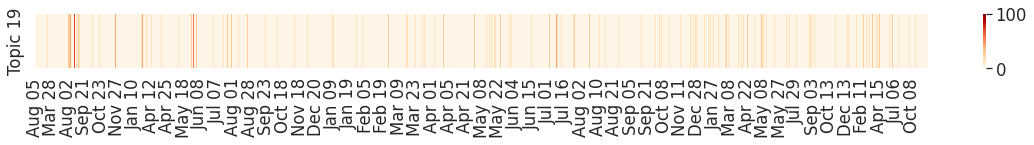

In [ ]:
rolling_window_length = 7

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("OrRd", 50),vmin= 0, vmax=100)

plt.savefig(f"{output_path}/plot_topic_19.png")

In [ ]:
articles_per_day = pd.read_excel('/content/Topic 20.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Topic 20  22656 non-null  int64
dtypes: int64(1)
memory usage: 354.0+ KB


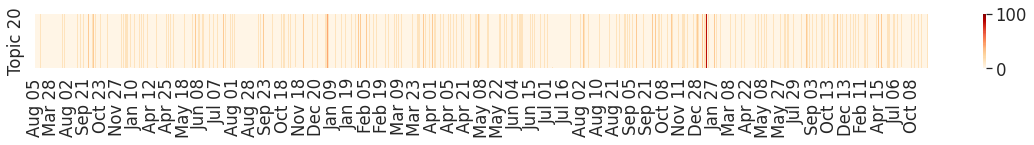

In [ ]:
rolling_window_length = 7

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("OrRd", 50),vmin= 0, vmax=100)

plt.savefig(f"{output_path}/plot_topic_20.png")

In [ ]:
articles_per_day = pd.read_excel('/content/Topic 21.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Topic 21  22656 non-null  int64
dtypes: int64(1)
memory usage: 354.0+ KB


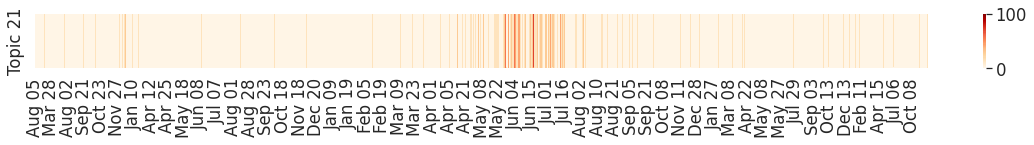

In [ ]:
rolling_window_length = 7

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("OrRd", 50),vmin= 0, vmax=100)

plt.savefig(f"{output_path}/plot_topic_21.png")

In [ ]:
articles_per_day = pd.read_excel('/content/Topic 22.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Topic 22  22656 non-null  int64
dtypes: int64(1)
memory usage: 354.0+ KB


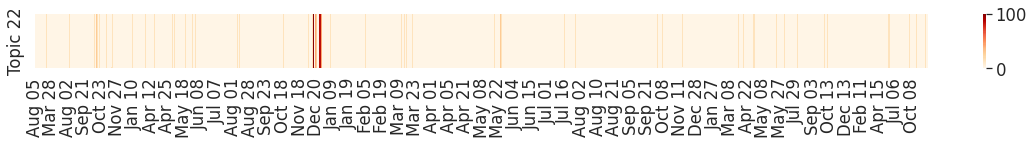

In [ ]:
rolling_window_length = 7

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("OrRd", 50),vmin= 0, vmax=100)

plt.savefig(f"{output_path}/plot_topic_22.png")

In [ ]:
articles_per_day = pd.read_excel('/content/Topic 23.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Topic 23  22656 non-null  int64
dtypes: int64(1)
memory usage: 354.0+ KB


In [ ]:
rolling_window_length = 7

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("OrRd", 50),vmin= 0, vmax=100)

plt.savefig(f"{output_path}/plot_topic_23.png")

In [ ]:
articles_per_day = pd.read_excel('/content/Topic 24.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Topic 24  22656 non-null  int64
dtypes: int64(1)
memory usage: 354.0+ KB


In [ ]:
rolling_window_length = 7

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("OrRd", 50),vmin= 0, vmax=100)

plt.savefig(f"{output_path}/plot_topic_24.png")

In [ ]:
articles_per_day = pd.read_excel('/content/Topic 25.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Topic 25  22656 non-null  int64
dtypes: int64(1)
memory usage: 354.0+ KB


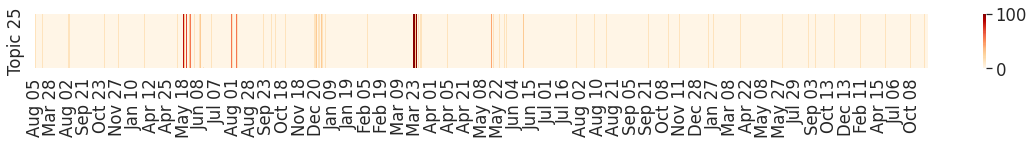

In [ ]:
rolling_window_length = 7

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("OrRd", 50),vmin= 0, vmax=100)

plt.savefig(f"{output_path}/plot_topic_25.png")

In [ ]:
articles_per_day = pd.read_excel('/content/Topic 26.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Topic 26  22656 non-null  int64
dtypes: int64(1)
memory usage: 354.0+ KB


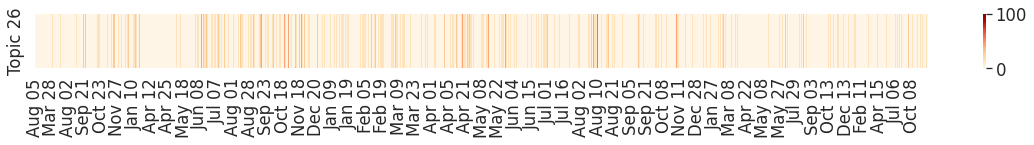

In [ ]:
rolling_window_length = 7

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("OrRd", 50),vmin= 0, vmax=100)

plt.savefig(f"{output_path}/plot_topic_26.png")

In [ ]:
articles_per_day = pd.read_excel('/content/Topic 27.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Topic 27  22656 non-null  int64
dtypes: int64(1)
memory usage: 354.0+ KB


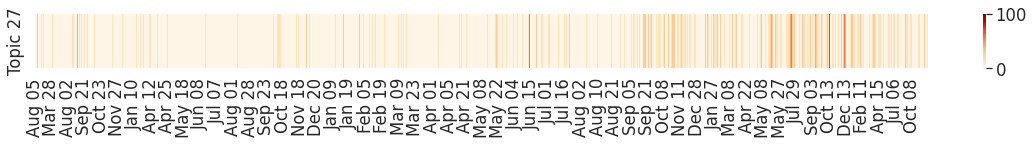

In [ ]:
rolling_window_length = 7

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("OrRd", 50),vmin= 0, vmax=100)

plt.savefig(f"{output_path}/plot_topic_27.png")

In [ ]:
articles_per_day = pd.read_excel('/content/Topic 28.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Topic 28  22656 non-null  int64
dtypes: int64(1)
memory usage: 354.0+ KB


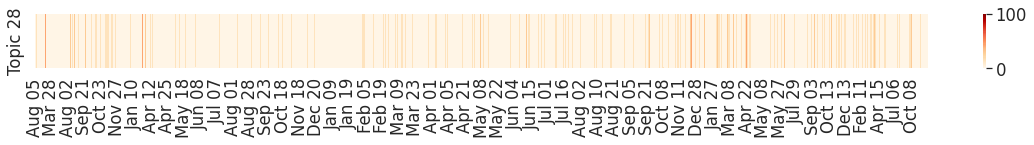

In [ ]:
rolling_window_length = 7

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("OrRd", 50),vmin= 0, vmax=100)

plt.savefig(f"{output_path}/plot_topic_28.png")

In [ ]:
articles_per_day = pd.read_excel('/content/Topic 29.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Topic 29  22656 non-null  int64
dtypes: int64(1)
memory usage: 354.0+ KB


In [ ]:
rolling_window_length = 7

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("OrRd", 50),vmin= 0, vmax=100)

plt.savefig(f"{output_path}/plot_topic_29.png")

In [ ]:
articles_per_day = pd.read_excel('/content/Topic 30.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Topic 30  22656 non-null  int64
dtypes: int64(1)
memory usage: 354.0+ KB


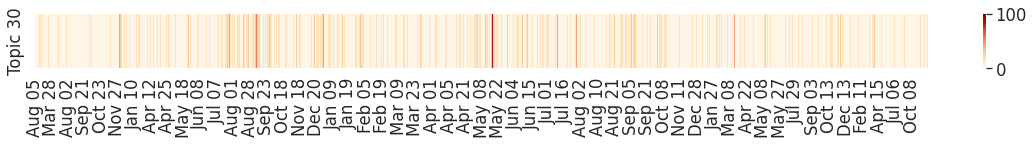

In [ ]:
rolling_window_length = 7

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("OrRd", 50),vmin= 0, vmax=100)

plt.savefig(f"{output_path}/plot_topic_30.png")

# Sentiment per Topic Per Day

In [ ]:
sentiments = pd.read_csv(f"{output_path}/fromImpossible_sentiment_30.csv")
sentiments.head()

id                 created_at  polarity  subjectivity
0  8.270000e+17  2017-02-01 22:07:28+00:00  0.50      0.600000    
1  7.600000e+17  2016-08-01 05:13:16+00:00  0.05      0.500000    
2  7.610000e+17  2016-08-03 21:34:47+00:00  0.60      0.816667    
3  7.620000e+17  2016-08-05 19:12:49+00:00  0.10      0.100000    
4  7.610000e+17  2016-08-05 01:28:22+00:00  0.00      0.000000

In [ ]:
articles_polarity = pd.merge(articles, sentiments[["id", "polarity"]], on="id", how="left")
articles_polarity = articles_polarity[['id', 'created_at', 'polarity', 'topic_label']]
articles_polarity.head()

id                 created_at  polarity topic_label
0  8.270000e+17  2017-02-01 22:07:28+00:00  0.500000  Topic 24  
1  8.270000e+17  2017-02-01 22:07:28+00:00  0.500000  Topic 24  
2  8.270000e+17  2017-02-01 22:07:28+00:00  0.100000  Topic 24  
3  8.270000e+17  2017-02-01 22:07:28+00:00  0.160714  Topic 24  
4  8.270000e+17  2017-02-01 22:07:28+00:00  0.104167  Topic 24

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf903dc050>]],
      dtype=object)

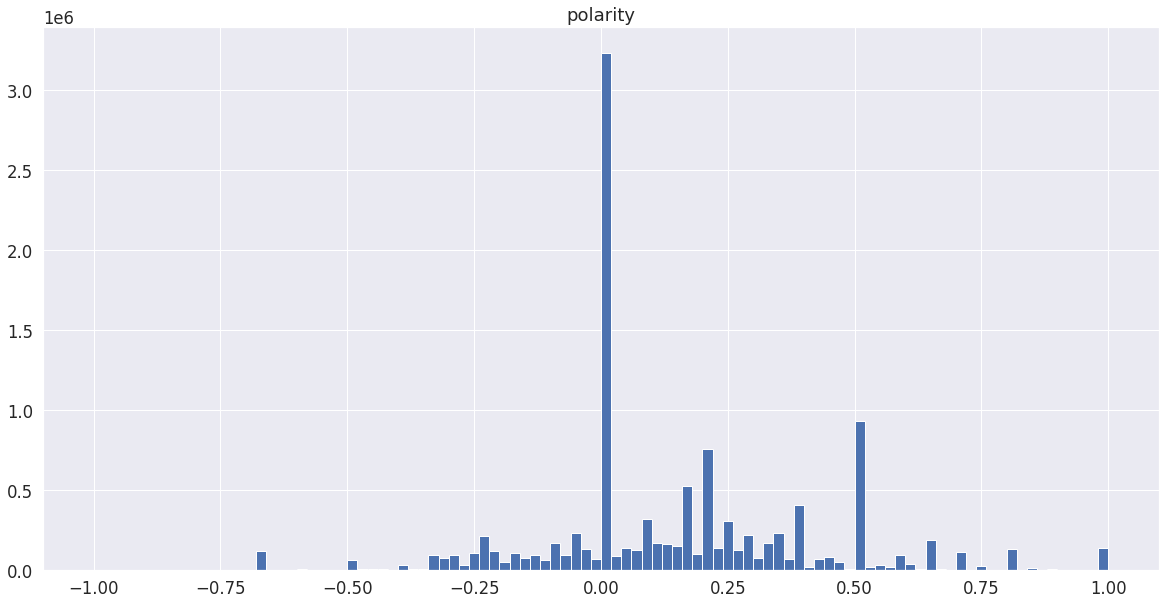

In [ ]:
articles_polarity.hist("polarity", bins=100, figsize=(20, 10))

In [ ]:
articles_per_day = articles_polarity[["created_at", "topic_label", "polarity"]].copy()
articles_per_day = articles_per_day.groupby(["created_at", "topic_label"]).agg({
    "polarity": lambda x: np.mean(list(x))
}).reset_index(drop=False)
articles_per_day.rename(columns={"polarity": "avg_polarity"}, inplace=True)

articles_per_day = articles_per_day.groupby("created_at").agg({
    "topic_label": lambda x: list(x),
    "avg_polarity": lambda x: list(x)
}).reset_index(drop=False)

articles_per_day["zip"] = articles_per_day.apply(lambda row: list(zip(row["topic_label"], row["avg_polarity"])), axis=1)

for topic_name in all_topics:
    articles_per_day[topic_name] = articles_per_day["zip"].apply(lambda x: [elem[1] for elem in x if elem[0] == topic_name])
    articles_per_day[topic_name] = articles_per_day[topic_name].apply(lambda x: x[0] if len(x) > 0 else 0)
articles_per_day.drop(["topic_label", "avg_polarity", "zip"], axis=1, inplace=True)

articles_per_day.set_index("created_at", drop=True, inplace=True)

articles_per_day.head()

Topic 24  Topic 1  Topic 28  Topic 13  Topic 5  \
created_at                                                                  
2016-02-16 17:03:56+00:00  0.0       0.00     0.0       0.0       0.0       
2016-04-11 21:17:48+00:00  0.0       0.00     0.0       0.0       0.0       
2016-04-22 16:58:58+00:00  0.0       0.00     0.0       0.0       0.0       
2016-05-17 20:43:17+00:00  0.0       0.25     0.0       0.0       0.0       
2016-08-01 05:13:16+00:00  0.0       0.05     0.0       0.0       0.0       

                           Topic 20  Topic 17  Topic 15  Topic 16  Topic 11  \
created_at                                                                    
2016-02-16 17:03:56+00:00  0.00000   0.0       0.0       0.0       0.0        
2016-04-11 21:17:48+00:00  0.08254   0.0       0.0       0.0       0.0        
2016-04-22 16:58:58+00:00  0.00000   0.0       0.0       0.0       0.0        
2016-05-17 20:43:17+00:00  0.00000   0.0       0.0       0.0       0.0        
2016-08-01 05:13:16+00:00  0.00000   0.0       0.0       0.0       0.0        

                           ...  Topic 3  Topic 6  Topic 19  Topic 22  \
created_at                 ...                                         
2016-02-16 17:03:56+00:00  ...  0.0      0.0      0.000     0.0        
2016-04-11 21:17:48+00:00  ...  0.0      0.0      0.000     0.0        
2016-04-22 16:58:58+00:00  ...  0.0      0.0      0.375     0.0        
2016-05-17 20:43:17+00:00  ...  0.0      0.0      0.000     0.0        
2016-08-01 05:13:16+00:00  ...  0.0      0.0      0.000     0.0        

                           Topic 21  Topic 26  Topic 2  Topic 18  Topic 23  \
created_at                                                                   
2016-02-16 17:03:56+00:00  0.0       0.0       0.0      0.0       0.0        
2016-04-11 21:17:48+00:00  0.0       0.0       0.0      0.0       0.0        
2016-04-22 16:58:58+00:00  0.0       0.0       0.0      0.0       0.0        
2016-05-17 20:43:17+00:00  0.0       0.0       0.0      0.0       0.0        
2016-08-01 05:13:16+00:00  0.0       0.0       0.0      0.0       0.0        

                           Topic 14  
created_at                           
2016-02-16 17:03:56+00:00  0.0       
2016-04-11 21:17:48+00:00  0.0       
2016-04-22 16:58:58+00:00  0.0       
2016-05-17 20:43:17+00:00  0.0       
2016-08-01 05:13:16+00:00  0.0       

[5 rows x 30 columns]

In [ ]:
articles_per_day.to_csv('sentiment_articles-per-day-30-impossible.csv')

In [ ]:
# upload file
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
articles_per_day = pd.read_csv('/content/sentiment_articles-per-day-30-impossible.csv')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Topic 1   22656 non-null  float64
 1   Topic 2   22656 non-null  float64
 2   Topic 3   22656 non-null  float64
 3   Topic 4   22656 non-null  float64
 4   Topic 5   22656 non-null  float64
 5   Topic 6   22656 non-null  float64
 6   Topic 7   22656 non-null  float64
 7   Topic 8   22656 non-null  float64
 8   Topic 9   22656 non-null  float64
 9   Topic 10  22656 non-null  float64
 10  Topic 11  22656 non-null  float64
 11  Topic 12  22656 non-null  float64
 12  Topic 13  22656 non-null  float64
 13  Topic 14  22656 non-null  float64
 14  Topic 15  22656 non-null  float64
 15  Topic 16  22656 non-null  float64
 16  Topic 17  22656 non-null  float64
 17  Topic 18  22656 non-null  float64
 18  Topic 19  22656 non-null  float64
 19  Topic 20  22656 non-null  fl

In [ ]:
rolling_window_length = 15

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 10))

sns.heatmap(df_heatmap, cmap=sns.color_palette("BrBG", 50))

plt.savefig(f"{output_path}/plot_sentiments_{num_topics}.pdf")

# Individual Topic Plots Sentiment Per Topic Per Day

In [ ]:
articles_per_day = pd.read_excel('/content/sentiment_topic 1.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Topic 1  22656 non-null  float64
dtypes: float64(1)
memory usage: 354.0+ KB


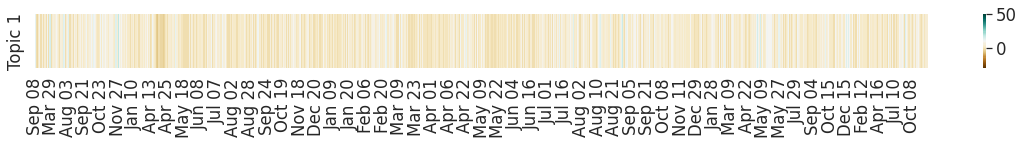

In [ ]:
rolling_window_length = 15

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("BrBG", 50),vmin= -30, vmax=50)

plt.savefig(f"{output_path}/Impossible Results/Untitled Folder/plot_sentiments_topic 1.png")

In [ ]:
articles_per_day = pd.read_excel('/content/sentiment_topic 2.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Topic 2  22656 non-null  float64
dtypes: float64(1)
memory usage: 354.0+ KB


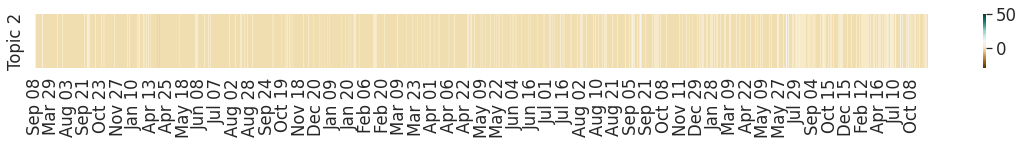

In [ ]:
rolling_window_length = 15

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("BrBG", 50),vmin= -30, vmax=50)

plt.savefig(f"{output_path}/Impossible Results/Untitled Folder/plot_sentiments_topic 2.png")

In [ ]:
articles_per_day = pd.read_excel('/content/sentiment_topic 3.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Topic 3  22656 non-null  float64
dtypes: float64(1)
memory usage: 354.0+ KB


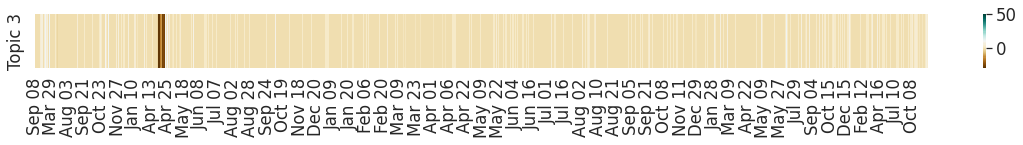

In [ ]:
rolling_window_length = 15

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("BrBG", 50),vmin= -30, vmax=50)

plt.savefig(f"{output_path}/Impossible Results/Untitled Folder/plot_sentiments_topic 3.png")

In [ ]:
articles_per_day = pd.read_excel('/content/sentiment_topic 4.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Topic 4  22656 non-null  float64
dtypes: float64(1)
memory usage: 354.0+ KB


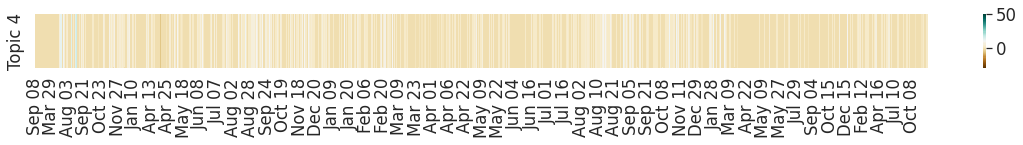

In [ ]:
rolling_window_length = 15

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("BrBG", 50),vmin= -30, vmax=50)

plt.savefig(f"{output_path}/Impossible Results/Untitled Folder/plot_sentiments_topic 4.png")

In [ ]:
articles_per_day = pd.read_excel('/content/sentiment_topic 5.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Topic 5  22656 non-null  float64
dtypes: float64(1)
memory usage: 354.0+ KB


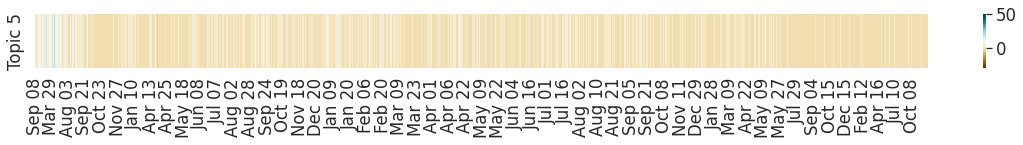

In [ ]:
rolling_window_length = 15

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("BrBG", 50),vmin= -30, vmax=50)

plt.savefig(f"{output_path}/Impossible Results/Untitled Folder/plot_sentiments_topic 5.png")

In [ ]:
articles_per_day = pd.read_excel('/content/sentiment_topic 6.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Topic 6  22656 non-null  float64
dtypes: float64(1)
memory usage: 354.0+ KB


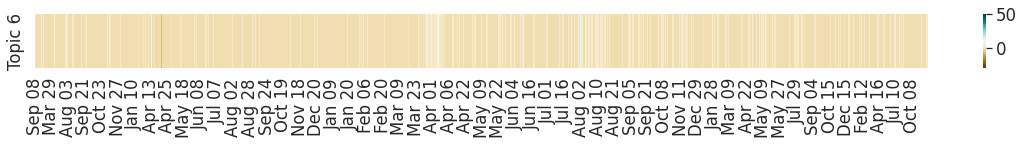

In [ ]:
rolling_window_length = 15

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("BrBG", 50),vmin= -30, vmax=50)

plt.savefig(f"{output_path}/Impossible Results/Untitled Folder/plot_sentiments_topic 6.png")

In [ ]:
articles_per_day = pd.read_excel('/content/sentiment_topic 7.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Topic 7  22656 non-null  float64
dtypes: float64(1)
memory usage: 354.0+ KB


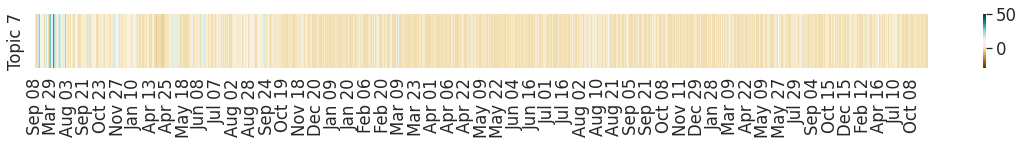

In [ ]:
rolling_window_length = 15

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("BrBG", 50),vmin= -30, vmax=50)

plt.savefig(f"{output_path}/Impossible Results/Untitled Folder/plot_sentiments_topic 7.png")

In [ ]:
articles_per_day = pd.read_excel('/content/sentiment_topic 8.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Topic 8  22656 non-null  float64
dtypes: float64(1)
memory usage: 354.0+ KB


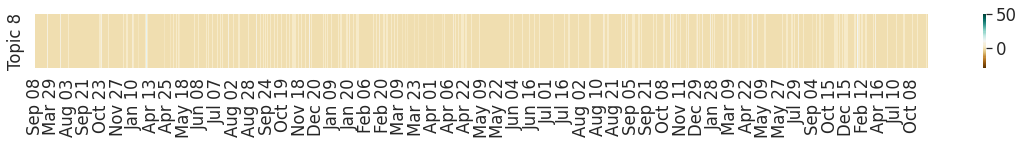

In [ ]:
rolling_window_length = 15

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("BrBG", 50),vmin= -30, vmax=50)

plt.savefig(f"{output_path}/Impossible Results/Untitled Folder/plot_sentiments_topic 8.png")

In [ ]:
articles_per_day = pd.read_excel('/content/sentiment_topic 9.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Topic 9  22656 non-null  float64
dtypes: float64(1)
memory usage: 354.0+ KB


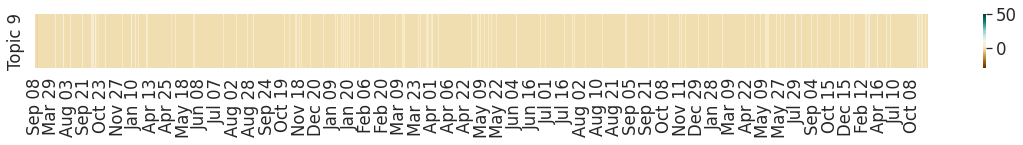

In [ ]:
rolling_window_length = 15

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("BrBG", 50),vmin= -30, vmax=50)

plt.savefig(f"{output_path}/Impossible Results/Untitled Folder/plot_sentiments_topic 9.png")

In [ ]:
articles_per_day = pd.read_excel('/content/sentiment_topic 10.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Topic 10  22656 non-null  float64
dtypes: float64(1)
memory usage: 354.0+ KB


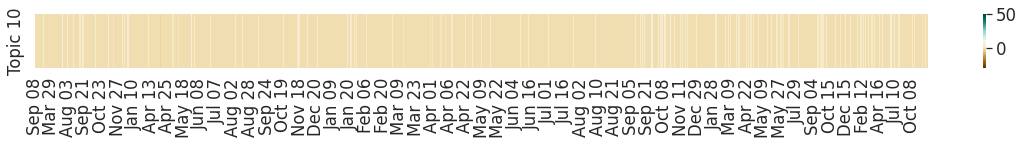

In [ ]:
rolling_window_length = 15

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("BrBG", 50),vmin= -30, vmax=50)

plt.savefig(f"{output_path}/Impossible Results/Untitled Folder/plot_sentiments_topic 10.png")

In [ ]:
articles_per_day = pd.read_excel('/content/sentiment_topic 11.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Topic 11  22656 non-null  float64
dtypes: float64(1)
memory usage: 354.0+ KB


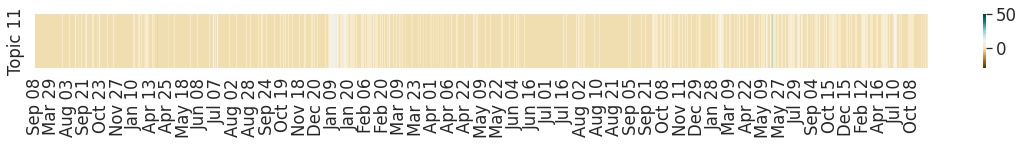

In [ ]:
rolling_window_length = 15

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("BrBG", 50),vmin= -30, vmax=50)

plt.savefig(f"{output_path}/Impossible Results/Untitled Folder/plot_sentiments_topic 11.png")

In [ ]:
articles_per_day = pd.read_excel('/content/sentiment_topic 12.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Topic 12  22656 non-null  float64
dtypes: float64(1)
memory usage: 354.0+ KB


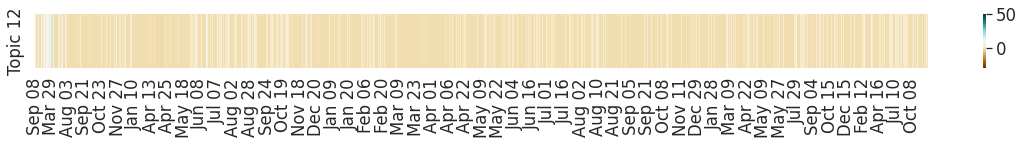

In [ ]:
rolling_window_length = 15

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("BrBG", 50),vmin= -30, vmax=50)

plt.savefig(f"{output_path}/Impossible Results/Untitled Folder/plot_sentiments_topic 12.png")

In [ ]:
articles_per_day = pd.read_excel('/content/sentiment_topic 13.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Topic 13  22656 non-null  float64
dtypes: float64(1)
memory usage: 354.0+ KB


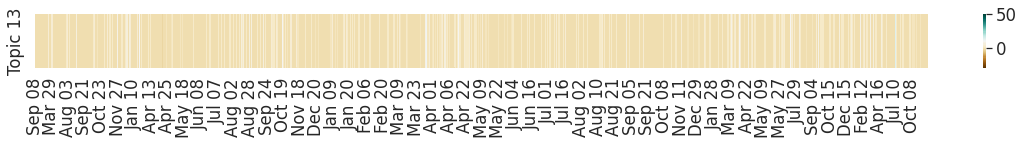

In [ ]:
rolling_window_length = 15

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("BrBG", 50),vmin= -30, vmax=50)

plt.savefig(f"{output_path}/Impossible Results/Untitled Folder/plot_sentiments_topic 13.png")

In [ ]:
articles_per_day = pd.read_excel('/content/sentiment_topic 14.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Topic 14  22656 non-null  float64
dtypes: float64(1)
memory usage: 354.0+ KB


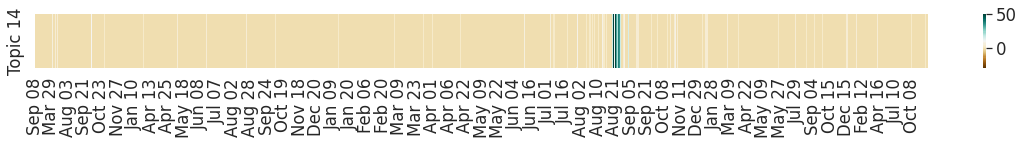

In [ ]:
rolling_window_length = 15

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("BrBG", 50),vmin= -30, vmax=50)

plt.savefig(f"{output_path}/Impossible Results/Untitled Folder/plot_sentiments_topic 14.png")

In [ ]:
articles_per_day = pd.read_excel('/content/sentiment_topic 15.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Topic 15  22656 non-null  float64
dtypes: float64(1)
memory usage: 354.0+ KB


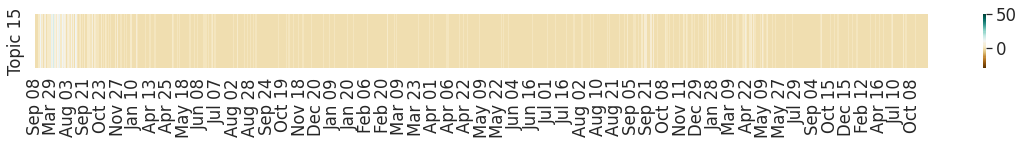

In [ ]:
rolling_window_length = 15

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("BrBG", 50),vmin= -30, vmax=50)

plt.savefig(f"{output_path}/Impossible Results/Untitled Folder/plot_sentiments_topic 15.png")

In [ ]:
articles_per_day = pd.read_excel('/content/sentiment_topic 16.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Topic 16  22656 non-null  float64
dtypes: float64(1)
memory usage: 354.0+ KB


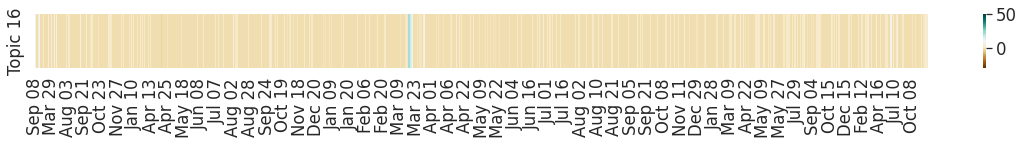

In [ ]:
rolling_window_length = 15

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("BrBG", 50),vmin= -30, vmax=50)

plt.savefig(f"{output_path}/Impossible Results/Untitled Folder/plot_sentiments_topic 16.png")

In [ ]:
articles_per_day = pd.read_excel('/content/sentiment_topic 17.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Topic 17  22656 non-null  float64
dtypes: float64(1)
memory usage: 354.0+ KB


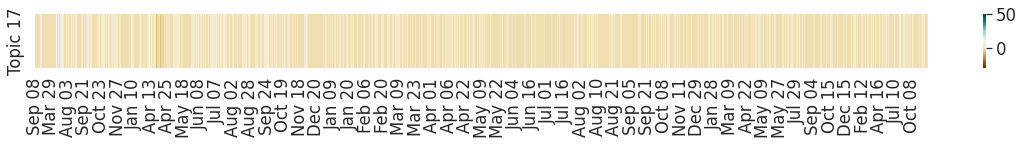

In [ ]:
rolling_window_length = 15

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("BrBG", 50),vmin= -30, vmax=50)

plt.savefig(f"{output_path}/Impossible Results/Untitled Folder/plot_sentiments_topic 17.png")

In [ ]:
articles_per_day = pd.read_excel('/content/sentiment_topic 18.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Topic 18  22656 non-null  float64
dtypes: float64(1)
memory usage: 354.0+ KB


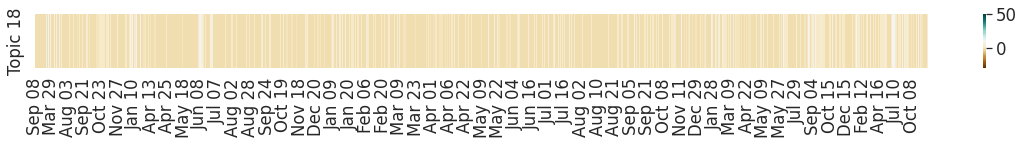

In [ ]:
rolling_window_length = 15

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("BrBG", 50),vmin= -30, vmax=50)

plt.savefig(f"{output_path}/Impossible Results/Untitled Folder/plot_sentiments_topic 18.png")

In [ ]:
articles_per_day = pd.read_excel('/content/sentiment_topic 19.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Topic 19  22656 non-null  float64
dtypes: float64(1)
memory usage: 354.0+ KB


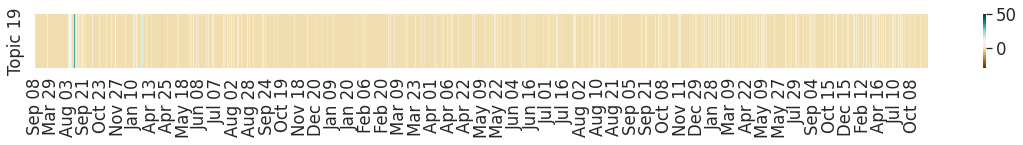

In [ ]:
rolling_window_length = 15

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("BrBG", 50),vmin= -30, vmax=50)

plt.savefig(f"{output_path}/Impossible Results/Untitled Folder/plot_sentiments_topic 19.png")

In [ ]:
articles_per_day = pd.read_excel('/content/sentiment_topic 20.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Topic 20  22656 non-null  float64
dtypes: float64(1)
memory usage: 354.0+ KB


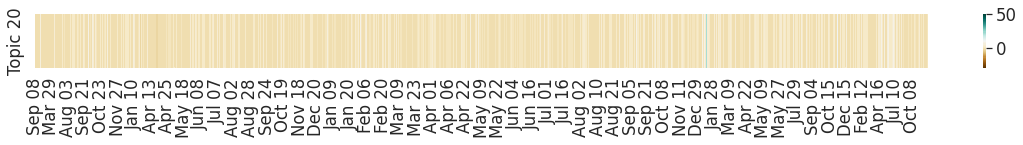

In [ ]:
rolling_window_length = 15

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("BrBG", 50),vmin= -30, vmax=50)

plt.savefig(f"{output_path}/Impossible Results/Untitled Folder/plot_sentiments_topic 20.png")

In [ ]:
articles_per_day = pd.read_excel('/content/sentiment_topic 21.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Topic 21  22656 non-null  float64
dtypes: float64(1)
memory usage: 354.0+ KB


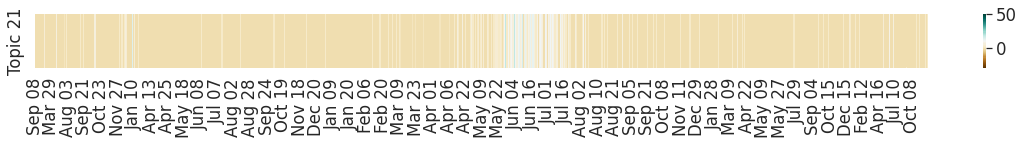

In [ ]:
rolling_window_length = 15

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("BrBG", 50),vmin= -30, vmax=50)

plt.savefig(f"{output_path}/Impossible Results/Untitled Folder/plot_sentiments_topic 21.png")

In [ ]:
articles_per_day = pd.read_excel('/content/sentiment_topic 22.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Topic 22  22656 non-null  float64
dtypes: float64(1)
memory usage: 354.0+ KB


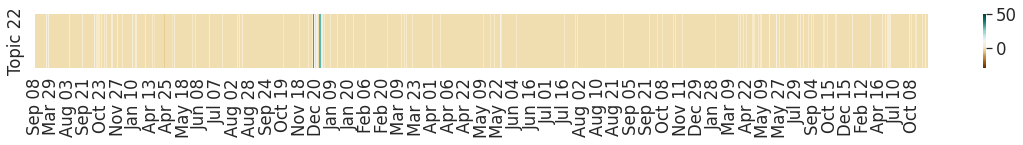

In [ ]:
rolling_window_length = 15

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("BrBG", 50),vmin= -30, vmax=50)

plt.savefig(f"{output_path}/Impossible Results/Untitled Folder/plot_sentiments_topic 22.png")

In [ ]:
articles_per_day = pd.read_excel('/content/sentiment_topic 23.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Topic 23  22656 non-null  float64
dtypes: float64(1)
memory usage: 354.0+ KB


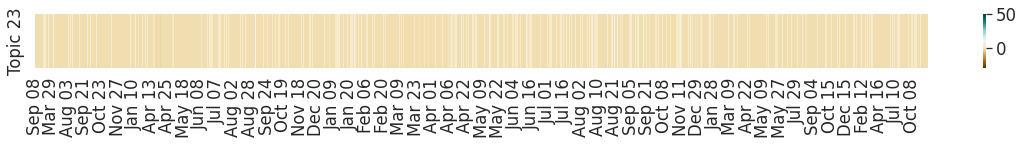

In [ ]:
rolling_window_length = 15

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("BrBG", 50),vmin= -30, vmax=50)

plt.savefig(f"{output_path}/Impossible Results/Untitled Folder/plot_sentiments_topic 23.png")

In [ ]:
articles_per_day = pd.read_excel('/content/sentiment_topic 24.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Topic 24  22656 non-null  float64
dtypes: float64(1)
memory usage: 354.0+ KB


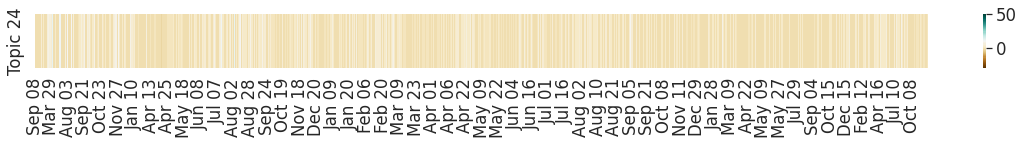

In [ ]:
rolling_window_length = 15

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("BrBG", 50),vmin= -30, vmax=50)

plt.savefig(f"{output_path}/Impossible Results/Untitled Folder/plot_sentiments_topic 24.png")

In [ ]:
articles_per_day = pd.read_excel('/content/sentiment_topic 25.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Topic 25  22656 non-null  float64
dtypes: float64(1)
memory usage: 354.0+ KB


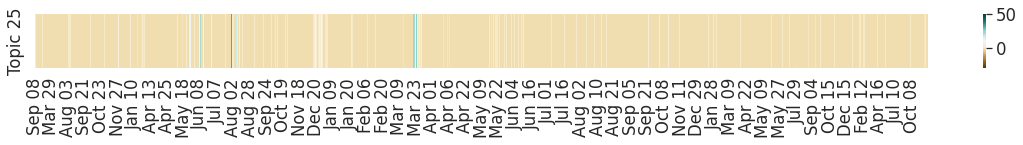

In [ ]:
rolling_window_length = 15

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("BrBG", 50),vmin= -30, vmax=50)

plt.savefig(f"{output_path}/Impossible Results/Untitled Folder/plot_sentiments_topic 25.png")

In [ ]:
articles_per_day = pd.read_excel('/content/sentiment_topic 26.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Topic 26  22656 non-null  float64
dtypes: float64(1)
memory usage: 354.0+ KB


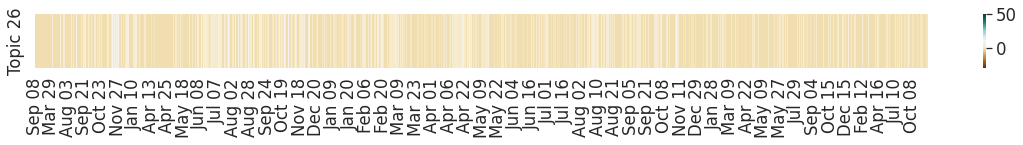

In [ ]:
rolling_window_length = 15

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("BrBG", 50),vmin= -30, vmax=50)

plt.savefig(f"{output_path}/Impossible Results/Untitled Folder/plot_sentiments_topic 26.png")

In [ ]:
articles_per_day = pd.read_excel('/content/sentiment_topic 27.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Topic 27  22656 non-null  float64
dtypes: float64(1)
memory usage: 354.0+ KB


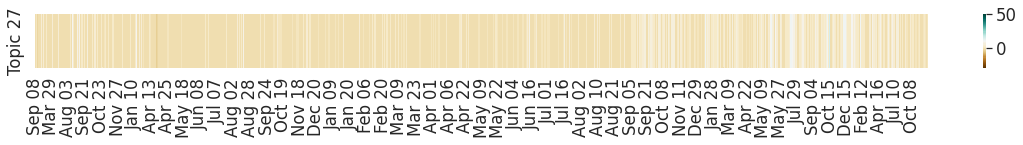

In [ ]:
rolling_window_length = 15

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("BrBG", 50),vmin= -30, vmax=50)

plt.savefig(f"{output_path}/Impossible Results/Untitled Folder/plot_sentiments_topic 27.png")

In [ ]:
articles_per_day = pd.read_excel('/content/sentiment_topic 28.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Topic 28  22656 non-null  float64
dtypes: float64(1)
memory usage: 354.0+ KB


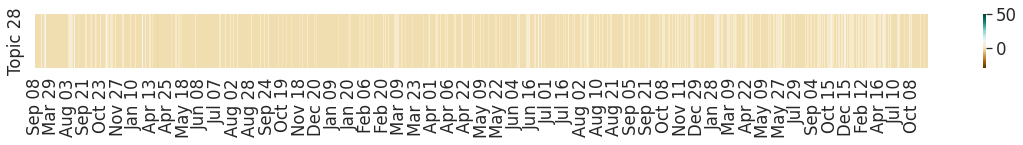

In [ ]:
rolling_window_length = 15

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("BrBG", 50),vmin= -30, vmax=50)

plt.savefig(f"{output_path}/Impossible Results/Untitled Folder/plot_sentiments_topic 28.png")

In [ ]:
articles_per_day = pd.read_excel('/content/sentiment_topic 29.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Topic 29  22656 non-null  float64
dtypes: float64(1)
memory usage: 354.0+ KB


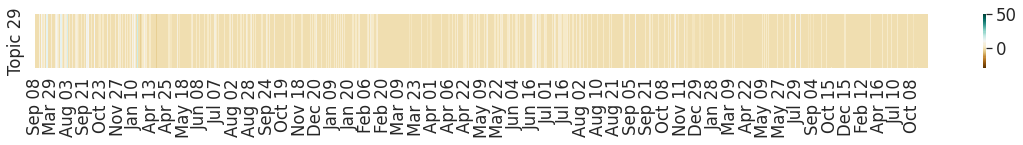

In [ ]:
rolling_window_length = 15

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("BrBG", 50),vmin= -30, vmax=50)

plt.savefig(f"{output_path}/Impossible Results/Untitled Folder/plot_sentiments_topic 29.png")

In [ ]:
articles_per_day = pd.read_excel('/content/sentiment_topic 30.xlsx')
articles_per_day.set_index("created_at", drop=True, inplace=True)
articles_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 2016-02-16 17:03:56+00:00 to 2021-12-08 23:09:35+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Topic 30  22656 non-null  float64
dtypes: float64(1)
memory usage: 354.0+ KB


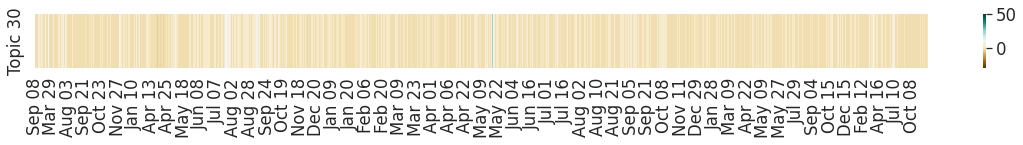

In [ ]:
rolling_window_length = 15

df_heatmap = articles_per_day.copy()

for col in df_heatmap.columns:
    
    # Normalise the results
    m = max(df_heatmap[col].values)
    df_heatmap[col] = 100 * df_heatmap[col] / m
    
    # Apply rolling window
    df_heatmap[col] = df_heatmap[col].rolling(window=rolling_window_length).mean()

df_heatmap.index = pd.to_datetime(df_heatmap.index.values).strftime('%b %d')
df_heatmap = df_heatmap.iloc[rolling_window_length-1:, :]
df_heatmap = df_heatmap.T

sns.set(font_scale=1.5)
fig=plt.figure(figsize=(20, 1))

sns.heatmap(df_heatmap, cmap=sns.color_palette("BrBG", 50),vmin= -30, vmax=50)

plt.savefig(f"{output_path}/Impossible Results/Untitled Folder/plot_sentiments_topic 30.png")

# Pyldavis Plots

In [ ]:
pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 11.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=04c33f32fde1ab246a6d520b09f5bed03c4cae1ce23510942111fd4b7da00414
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
from gensim.models.ldamodel import LdaModel
import numpy

def ldaMalletConvertToldaGen(ldamallet):
    model_gensim = LdaModel(id2word=ldamallet.id2word, num_topics=30, alpha=ldamallet.alpha, eta=0, iterations=1000, gamma_threshold=0.001, dtype=numpy.float32)
    model_gensim.state.sstats[...] = ldamallet.wordtopics
    model_gensim.sync_state()
    return model_gensim

converted_model = ldaMalletConvertToldaGen(ldamallet)

In [ ]:
# visualize the intractive LDA plot 30
lda_display = pyLDAvis.gensim_models.prepare(converted_model, 
                                      corpus, id2word, 
                                      sort_topics=False
                                      )
pyLDAvis.display(lda_display)

In [ ]:
lda_display.topic_info

Term         Freq        Total Category  logprob  loglift
63    impossible       7550.000000  7550.000000  Default  30.0000  30.0000
60    burger           5310.000000  5310.000000  Default  29.0000  29.0000
64    make             3986.000000  3986.000000  Default  28.0000  28.0000
1     hear             3345.000000  3345.000000  Default  27.0000  27.0000
2     love             2508.000000  2508.000000  Default  26.0000  26.0000
321   give             1934.000000  1934.000000  Default  25.0000  25.0000
23    stay             1886.000000  1886.000000  Default  24.0000  24.0000
24    tune             1859.000000  1859.000000  Default  23.0000  23.0000
99    support          1794.000000  1794.000000  Default  22.0000  22.0000
10    enjoy            1778.000000  1778.000000  Default  21.0000  21.0000
84    work             1753.000000  1753.000000  Default  20.0000  20.0000
56    restaurant       2102.000000  2102.000000  Default  19.0000  19.0000
58    store            1357.000000  1357.000000  Default  18.0000  18.0000
142   product          1938.000000  1938.000000  Default  17.0000  17.0000
291   forward          1471.000000  1471.000000  Default  16.0000  16.0000
12    meat             1494.000000  1494.000000  Default  15.0000  15.0000
150   grow             1655.000000  1655.000000  Default  14.0000  14.0000
452   safety           1471.000000  1471.000000  Default  13.0000  13.0000
49    food             1576.000000  1576.000000  Default  12.0000  12.0000
44    future           1148.000000  1148.000000  Default  11.0000  11.0000
74    share            1824.000000  1824.000000  Default  10.0000  10.0000
156   find             1101.000000  1101.000000  Default  9.0000   9.0000 
42    year             1678.000000  1678.000000  Default  8.0000   8.0000 
95    good             957.000000   957.000000   Default  7.0000   7.0000 
162   location         972.000000   972.000000   Default  6.0000   6.0000 
978   recipe           938.000000   938.000000   Default  5.0000   5.0000 
167   grocery          931.000000   931.000000   Default  4.0000   4.0000 
20    time             984.000000   984.000000   Default  3.0000   3.0000 
300   feedback         826.000000   826.000000   Default  2.0000   2.0000 
57    retail           964.000000   964.000000   Default  1.0000   1.0000 
58    store            1357.814367  1357.814367  Topic1  -1.3881   3.3722 
167   grocery          931.352815   931.352815   Topic1  -1.7651   3.3722 
170   licious          1.225464     1.225464     Topic1  -8.3984   3.3722 
283   announce         191.172417   191.172417   Topic1  -3.3486   3.3722 
386   wednesdaywisdom  4.901857     4.901857     Topic1  -7.0121   3.3722 
598   bbf              1.225464     1.225464     Topic1  -8.3984   3.3722 
667   excite           93.135277    93.135277    Topic1  -4.0677   3.3722 
1037  lookout          12.254642    12.254642    Topic1  -6.0958   3.3722 
1109  closest          6.127321     6.127321     Topic1  -6.7890   3.3722 
1343  availability     52.694961    52.694961    Topic1  -4.6372   3.3722 
1376  condition        7.352785     7.352785     Topic1  -6.6067   3.3722 
1410  iblaxauqgg       1.225464     1.225464     Topic1  -8.3984   3.3722 
1437  csrbleql         1.225464     1.225464     Topic1  -8.3984   3.3722 
1462  croissandwich    1.225464     1.225464     Topic1  -8.3984   3.3722 
1721  socal            26.960213    26.960213    Topic1  -5.3074   3.3722 
1830  upz              1.225464     1.225464     Topic1  -8.3984   3.3722 
1835  pt               3.676393     3.676393     Topic1  -7.2998   3.3722 
1842  evidently        1.225464     1.225464     Topic1  -8.3984   3.3722 
1871  stoke            161.761275   161.761275   Topic1  -3.5156   3.3722 
1907  start_selle      13.480107    13.480107    Topic1  -6.0005   3.3722 
1919  zuo              1.225464     1.225464     Topic1  -8.3984   3.3722 
2055  jovsybnqlm       1.225464     1.225464     Topic1  -8.3984   3.3722 
2085  kmckkup          1.225464     1.2254

In [ ]:
lda_display.topic_info.to_excel('pyldavis_wordfreq_impossibleFoods_30.xlsx')